# Marital Satisfaction Data Mining Project
## CDS6314

**Group Members:** 
| Student ID    | Name                            |
| -------------- | ------------------------------ |
| 1211102409    | CHUA KAI ZHENG                 |
| 1211102696    | LEE JIA MENG                   |
| 1211103527    | MUHAMMAD IRFAN HAQIEF BIN RAZAK |
| 1211100917    | NATALIE TAN LI YI              |

**Group Number:**  TT1L_G7

### Project Objective
To build the best marital satisfaction model by identify variables that influence marital satisfaction and happiness across different cultures using various machine learning models.

### Explonatory question


### Dataset
- **Source**: Marital satisfaction data from 33 countries
- **Variables**: Sex, age, marriage duration, religion, number of children, economic status, education, collectivistic values
- **Target**: Marital satisfaction scores


---
# Section 1: Project Setup and Data Preprocessing

## Overview
This section handles the initial setup including library imports, data loading, and comprehensive data preprocessing to prepare a clean dataset for analysis.

## Tasks:
1. Import required libraries for data analysis and machine learning
2. Load the marital satisfaction dataset from Excel file
3. Initial data inspection and overview
4. **Comprehensive data cleaning:**
   - Remove header rows and rename all 31 columns
   - Handle missing values (Religion nulls)
   - Fix data types for collectivism variables
   - Data quality verification

## Expected Outputs:
- Successfully imported libraries with proper configuration
- Dataset loaded (7,180 original rows, 31 columns)
- Initial understanding of data structure from 33 countries
- **Clean dataset ready for analysis (7,092 clean rows, no missing values)**

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# display output clearly
pd.set_option('display.max_columns', None)


try:
  drive_path
except NameError:
  drive_path = ''



df = pd.read_excel(drive_path + "Marital satisfaction_Data.xlsx")


In [2]:
# Basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn names:")
print(list(df.columns))
df.head()

Dataset shape: (7180, 31)
Rows: 7180, Columns: 31

Column names:
['Country ', 'Sex (1-M, 2-F)', 'Age', 'Marriage duration (years)', 'Number of children', 'Number of brought up children', 'Education (1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree) ', 'Material status (1-much better than average in my country, 2-better than average in my country, 3-similar to average in my country, 4-worse than average in my country, 5-much worse than average in my country)', 'Religion (1-Protestant, 2-Catholic,  3-Jewish, 4-Muslim, 5-Buddhist, 6-None, 7-Jehovah, 8-Evangelic, 9-Spiritualism, 10-Other - very specific, 11-Orthodox, 12-Hinduism) ', 'Religiosity (1-not religious at all, 7-extremely religious)', 'Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)', 'Marriage and Relationships Questionnaire (MRQ) (1-yes, 3-neither yes nor no, 5-no)', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15

,Country,"Sex (1-M, 2-F)",Age,Marriage duration (years),Number of children,Number of brought up children,"Education (1-no formal education, 2-primary school, 3-secondary school, 4-high school or technical college, 5-bachelor or master degree)","Material status (1-much better than average in my country, 2-better than average in my country, 3-similar to average in my country, 4-worse than average in my country, 5-much worse than average in my country)","Religion (1-Protestant, 2-Catholic, 3-Jewish, 4-Muslim, 5-Buddhist, 6-None, 7-Jehovah, 8-Evangelic, 9-Spiritualism, 10-Other - very specific, 11-Orthodox, 12-Hinduism)","Religiosity (1-not religious at all, 7-extremely religious)","Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)","Marriage and Relationships Questionnaire (MRQ) (1-yes, 3-neither yes nor no, 5-no)",Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"Kansas Marital Satisfaction Scale (KMSS) (1-very dissatisfied, 7-very satisfied)",Unnamed: 21,Unnamed: 22,"Collectivism-Individualism (GLOBE survey) (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)",Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Item number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,1,2.0,3.0,4.0,1,2.0,3.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National level,NaN,NaN,NaN,Individual level,NaN,NaN,NaN
2,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
4,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0


In [3]:
# Clean the dataset - Remove header rows and fix column names

# Remove the first 2 rows (they are headers, not data)
df_clean = df.drop([0, 1]).reset_index(drop=True)

# Create proper column names based on the research paper and the Maslow's Hierarchy of Needs
column_names = [
    'Country',                    # Column 0
    'Sex',                        # Column 1: 1=Male, 2=Female  
    'Age',                        # Column 2
    'Marriage_Duration',          # Column 3
    'Number_Children',            # Column 4
    'Number_Brought_Up_Children', # Column 5
    'Education',                  # Column 6
    'physio',                     # Column 7
    'Religion',                   # Column 8
    'Religiosity',                # Column 9
    'safety',                     # Column 10
    'love4',                      # Column 11: MRQ item 1
    'happy',                      # Column 12: MRQ item 2
    'esteem2',                    # Column 13: MRQ item 3
    'love5',                      # Column 14: MRQ item 4
    'love3',                      # Column 15: MRQ item 5
    'esteem1',                    # Column 16: MRQ item 6
    'sact',                       # Column 17: MRQ item 7
    'love2',                      # Column 18: MRQ item 8
    'love1',                      # Column 19: MRQ item 9
    'KMSS_1',                     # Column 20: KMSS item 1
    'KMSS_2',                     # Column 21: KMSS item 2
    'KMSS_3',                     # Column 22: KMSS item 3
    'Collectivism_National_1',    # Column 23: National level item 1
    'Collectivism_National_2',    # Column 24: National level item 2
    'Collectivism_National_3',    # Column 25: National level item 3
    'Collectivism_National_4',    # Column 26: National level item 4
    'Collectivism_Individual_1',  # Column 27: Individual level item 1
    'Collectivism_Individual_2',  # Column 28: Individual level item 2
    'Collectivism_Individual_3',  # Column 29: Individual level item 3
    'Collectivism_Individual_4'   # Column 30: Individual level item 4
]


# Apply new column names
df_clean.columns = column_names

print("\nAfter cleaning:")
print(f"Shape: {df_clean.shape}")
print("New column names:")
print(list(df_clean.columns))
print("\nFirst few rows:")
df_clean.head()


After cleaning:
Shape: (7178, 31)
New column names:
['Country', 'Sex', 'Age', 'Marriage_Duration', 'Number_Children', 'Number_Brought_Up_Children', 'Education', 'physio', 'Religion', 'Religiosity', 'safety', 'love4', 'happy', 'esteem2', 'love5', 'love3', 'esteem1', 'sact', 'love2', 'love1', 'KMSS_1', 'KMSS_2', 'KMSS_3', 'Collectivism_National_1', 'Collectivism_National_2', 'Collectivism_National_3', 'Collectivism_National_4', 'Collectivism_Individual_1', 'Collectivism_Individual_2', 'Collectivism_Individual_3', 'Collectivism_Individual_4']

First few rows:


,Country,Sex,Age,Marriage_Duration,Number_Children,Number_Brought_Up_Children,Education,physio,Religion,Religiosity,safety,love4,happy,esteem2,love5,love3,esteem1,sact,love2,love1,KMSS_1,KMSS_2,KMSS_3,Collectivism_National_1,Collectivism_National_2,Collectivism_National_3,Collectivism_National_4,Collectivism_Individual_1,Collectivism_Individual_2,Collectivism_Individual_3,Collectivism_Individual_4
0,Brazil,1.0,21.0,2.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,7.0,7.0,7.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
1,Brazil,1.0,29.0,3.0,1.0,0.0,5.0,3.0,1.0,6.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,6.0,6.0,2,1.0,1.0,1.0,1,1.0,1.0,1.0
2,Brazil,1.0,30.0,7.0,0.0,0.0,5.0,3.0,1.0,4.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,7.0,7.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0
3,Brazil,1.0,30.0,7.0,1.0,1.0,5.0,3.0,1.0,6.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,6.0,6.0,3,1.0,1.0,2.0,1,1.0,1.0,1.0
4,Brazil,1.0,28.0,9.0,0.0,0.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,7.0,6.0,7.0,3,2.0,3.0,2.0,1,1.0,1.0,1.0


In [4]:
# Basic data info after cleaning
df_clean.info()


# Check for unique values in each column
for col in df_clean.columns:
    unique_values = df_clean[col].unique()
    # Convert unique values to string and join with comma
    unique_values_str = ", ".join(map(str, unique_values))
    print(f"{col}: {unique_values_str}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     7178 non-null   object 
 1   Sex                         7178 non-null   float64
 2   Age                         7178 non-null   float64
 3   Marriage_Duration           7178 non-null   float64
 4   Number_Children             7178 non-null   float64
 5   Number_Brought_Up_Children  7178 non-null   float64
 6   Education                   7178 non-null   float64
 7   physio                      7178 non-null   float64
 8   Religion                    7092 non-null   float64
 9   Religiosity                 7178 non-null   float64
 10  safety                      7178 non-null   float64
 11  love4                       7178 non-null   float64
 12  happy                       7178 non-null   float64
 13  esteem2                     7178 

In [5]:
# Fix missing values for the religion feature : Remove rows with missing religio
df_clean = df_clean.dropna(subset=['Religion'])

#Wrong data types for collectivism columns
collectivism_cols = ['Collectivism_National_1', 'Collectivism_Individual_1']
df_clean[collectivism_cols] = df_clean[collectivism_cols].astype('float64')

# Data validation - Remove out-of-range values before reverse coding
print(f"Rows before validation: {len(df_clean)}")

# MRQ items should be 1-5 in original data
mrq_cols = ['love4', 'happy', 'esteem2', 'love5', 'love3', 'esteem1', 'sact', 'love2', 'love1']
for col in mrq_cols:
    invalid_count = len(df_clean[(df_clean[col] < 1) | (df_clean[col] > 5)])
    if invalid_count > 0:
        df_clean = df_clean[(df_clean[col] >= 1) & (df_clean[col] <= 5)]

# Material status (physio) should be 1-5 in original data  
invalid_physio = len(df_clean[(df_clean['physio'] < 1) | (df_clean['physio'] > 5)])
if invalid_physio > 0:
    df_clean = df_clean[(df_clean['physio'] >= 1) & (df_clean['physio'] <= 5)]

# Safety should be 1-7 in original data
invalid_safety = len(df_clean[(df_clean['safety'] < 1) | (df_clean['safety'] > 7)])
if invalid_safety > 0:
    df_clean = df_clean[(df_clean['safety'] >= 1) & (df_clean['safety'] <= 7)]

print(f"Rows after validation: {len(df_clean)}")

#C
df_clean.info()

Rows before validation: 7092
Rows after validation: 7051
<class 'pandas.core.frame.DataFrame'>
Index: 7051 entries, 0 to 7173
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     7051 non-null   object 
 1   Sex                         7051 non-null   float64
 2   Age                         7051 non-null   float64
 3   Marriage_Duration           7051 non-null   float64
 4   Number_Children             7051 non-null   float64
 5   Number_Brought_Up_Children  7051 non-null   float64
 6   Education                   7051 non-null   float64
 7   physio                      7051 non-null   float64
 8   Religion                    7051 non-null   float64
 9   Religiosity                 7051 non-null   float64
 10  safety                      7051 non-null   float64
 11  love4                       7051 non-null   float64
 12  happy                       7051 non-n

In [6]:
# Reverse-code scales to make all "higher = better"
# Reverse MRQ items (1-5 scale: 1=YES, 5=NO) → (1=NO, 5=YES)
mrq_cols = ['love4', 'happy', 'esteem2', 'love5', 'love3', 'esteem1', 'sact', 'love2', 'love1']
for col in mrq_cols:
    df_clean[col] = 6 - df_clean[col]  # Reverse 1-5 scale

# Reverse Collectivism scales (1-7 scale: 1=agree, 7=disagree) → (1=disagree, 7=agree)  
collectivism_cols = ['Collectivism_National_1', 'Collectivism_National_2', 'Collectivism_National_3', 'Collectivism_National_4',
                    'Collectivism_Individual_1', 'Collectivism_Individual_2', 'Collectivism_Individual_3', 'Collectivism_Individual_4']
for col in collectivism_cols:
    df_clean[col] = 8 - df_clean[col]  # Reverse 1-7 scale

# Reverse Material status (1-5 scale: 1=better, 5=worse) → (1=worse, 5=better)
df_clean['physio'] = 6 - df_clean['physio']

# Reverse Safety/Pension scale  
df_clean['safety'] = 8 - df_clean['safety']


---
# Section 2: Exploratory Data Analysis

## Overview
This section presents a comprehensive exploratory data analysis of the cleaned marital satisfaction dataset. The analysis revealed critical data quality issues that were addressed, identified the "ceiling effect" in satisfaction scores, and established KMSS_2 as the primary target variable through correlation analysis. The EDA includes univariate analysis with histograms and descriptive statistics, followed by extensive bivariate analysis using correlation tables and compositional visualizations.

## 2.1 Univariate Analysis
**Completed Tasks:**
- **Descriptive Statistics:** Generated comprehensive statistical summaries for all numerical variables
- **Distribution Analysis:** Created histograms for all 28 numerical/ordinal variables with proper bin alignment and axis labeling
- **Categorical Analysis:** Bar charts for Sex, Religion, and Country distributions


## 2.2 Bivariate Analysis
**Completed Tasks:**
- **Correlation Analysis:** Spearman correlation matrix comparing all predictors with KMSS_1, KMSS_2, and KMSS_3
- **Target Selection:** Selected KMSS_2 as primary target based on strongest correlation patterns
- **Compositional Analysis:** Created comprehensive 100% stacked bar charts for:
  - Main demographic variables (Sex, Age Group, Education, Religiosity, Material Status, Safety, Religion)
  - All 9 MRQ relationship quality items
  - All 8 Collectivism items (National and Individual levels)
- **Visual Insights:** Charts clearly show satisfaction distribution patterns across all predictor categories

## 2.3 Multivariate Analysis
**Status:** Ready for implementation (country-level analysis and interaction effects)

## Key Findings:
- **Data Quality:** Removed 127 invalid records, resulting in 7,051 clean observations
- **Target Variable:** KMSS_2 selected as primary target due to strongest predictor correlations
- **Distribution Patterns:** Severe positive skew in satisfaction scores ("ceiling effect")
- **Relationship Strength:** MRQ items show strongest correlations with satisfaction outcomes


In [7]:
# 2.1 Univariate Analysis

# 2.1.1 Descriptive Statistics
print("=== DESCRIPTIVE STATISTICS ===")
print("Overall dataset statistics:")
df_clean.describe()

=== DESCRIPTIVE STATISTICS ===
Overall dataset statistics:


,Sex,Age,Marriage_Duration,Number_Children,Number_Brought_Up_Children,Education,physio,Religion,Religiosity,safety,love4,happy,esteem2,love5,love3,esteem1,sact,love2,love1,KMSS_1,KMSS_2,KMSS_3,Collectivism_National_1,Collectivism_National_2,Collectivism_National_3,Collectivism_National_4,Collectivism_Individual_1,Collectivism_Individual_2,Collectivism_Individual_3,Collectivism_Individual_4
count,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000,7051.000000
mean,1.533116,40.702241,14.801853,1.764289,1.461353,4.245213,3.388172,4.006382,4.038576,4.337115,4.557368,4.414267,4.481492,4.463339,4.479648,4.711388,4.566161,4.072472,4.675507,5.734931,5.769253,5.730393,5.505886,6.014466,4.455113,5.321515,5.806269,6.118565,4.604737,5.014608
std,0.498938,11.444904,11.583802,1.300204,1.376202,0.946290,0.824326,3.022767,1.774824,1.947891,0.803322,0.832575,0.796654,0.873509,0.864085,0.609811,0.775684,1.072147,0.708365,1.453076,1.458921,1.476457,1.460327,1.430396,1.817197,1.762016,1.528146,1.466064,1.957180,1.923409
min,1.000000,17.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,3.000000,5.000000,5.000000,6.000000,3.000000,4.000000
50%,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,6.000000,6.000000,7.000000,5.000000,6.000000
75%,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000
max,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,5.000000,12.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


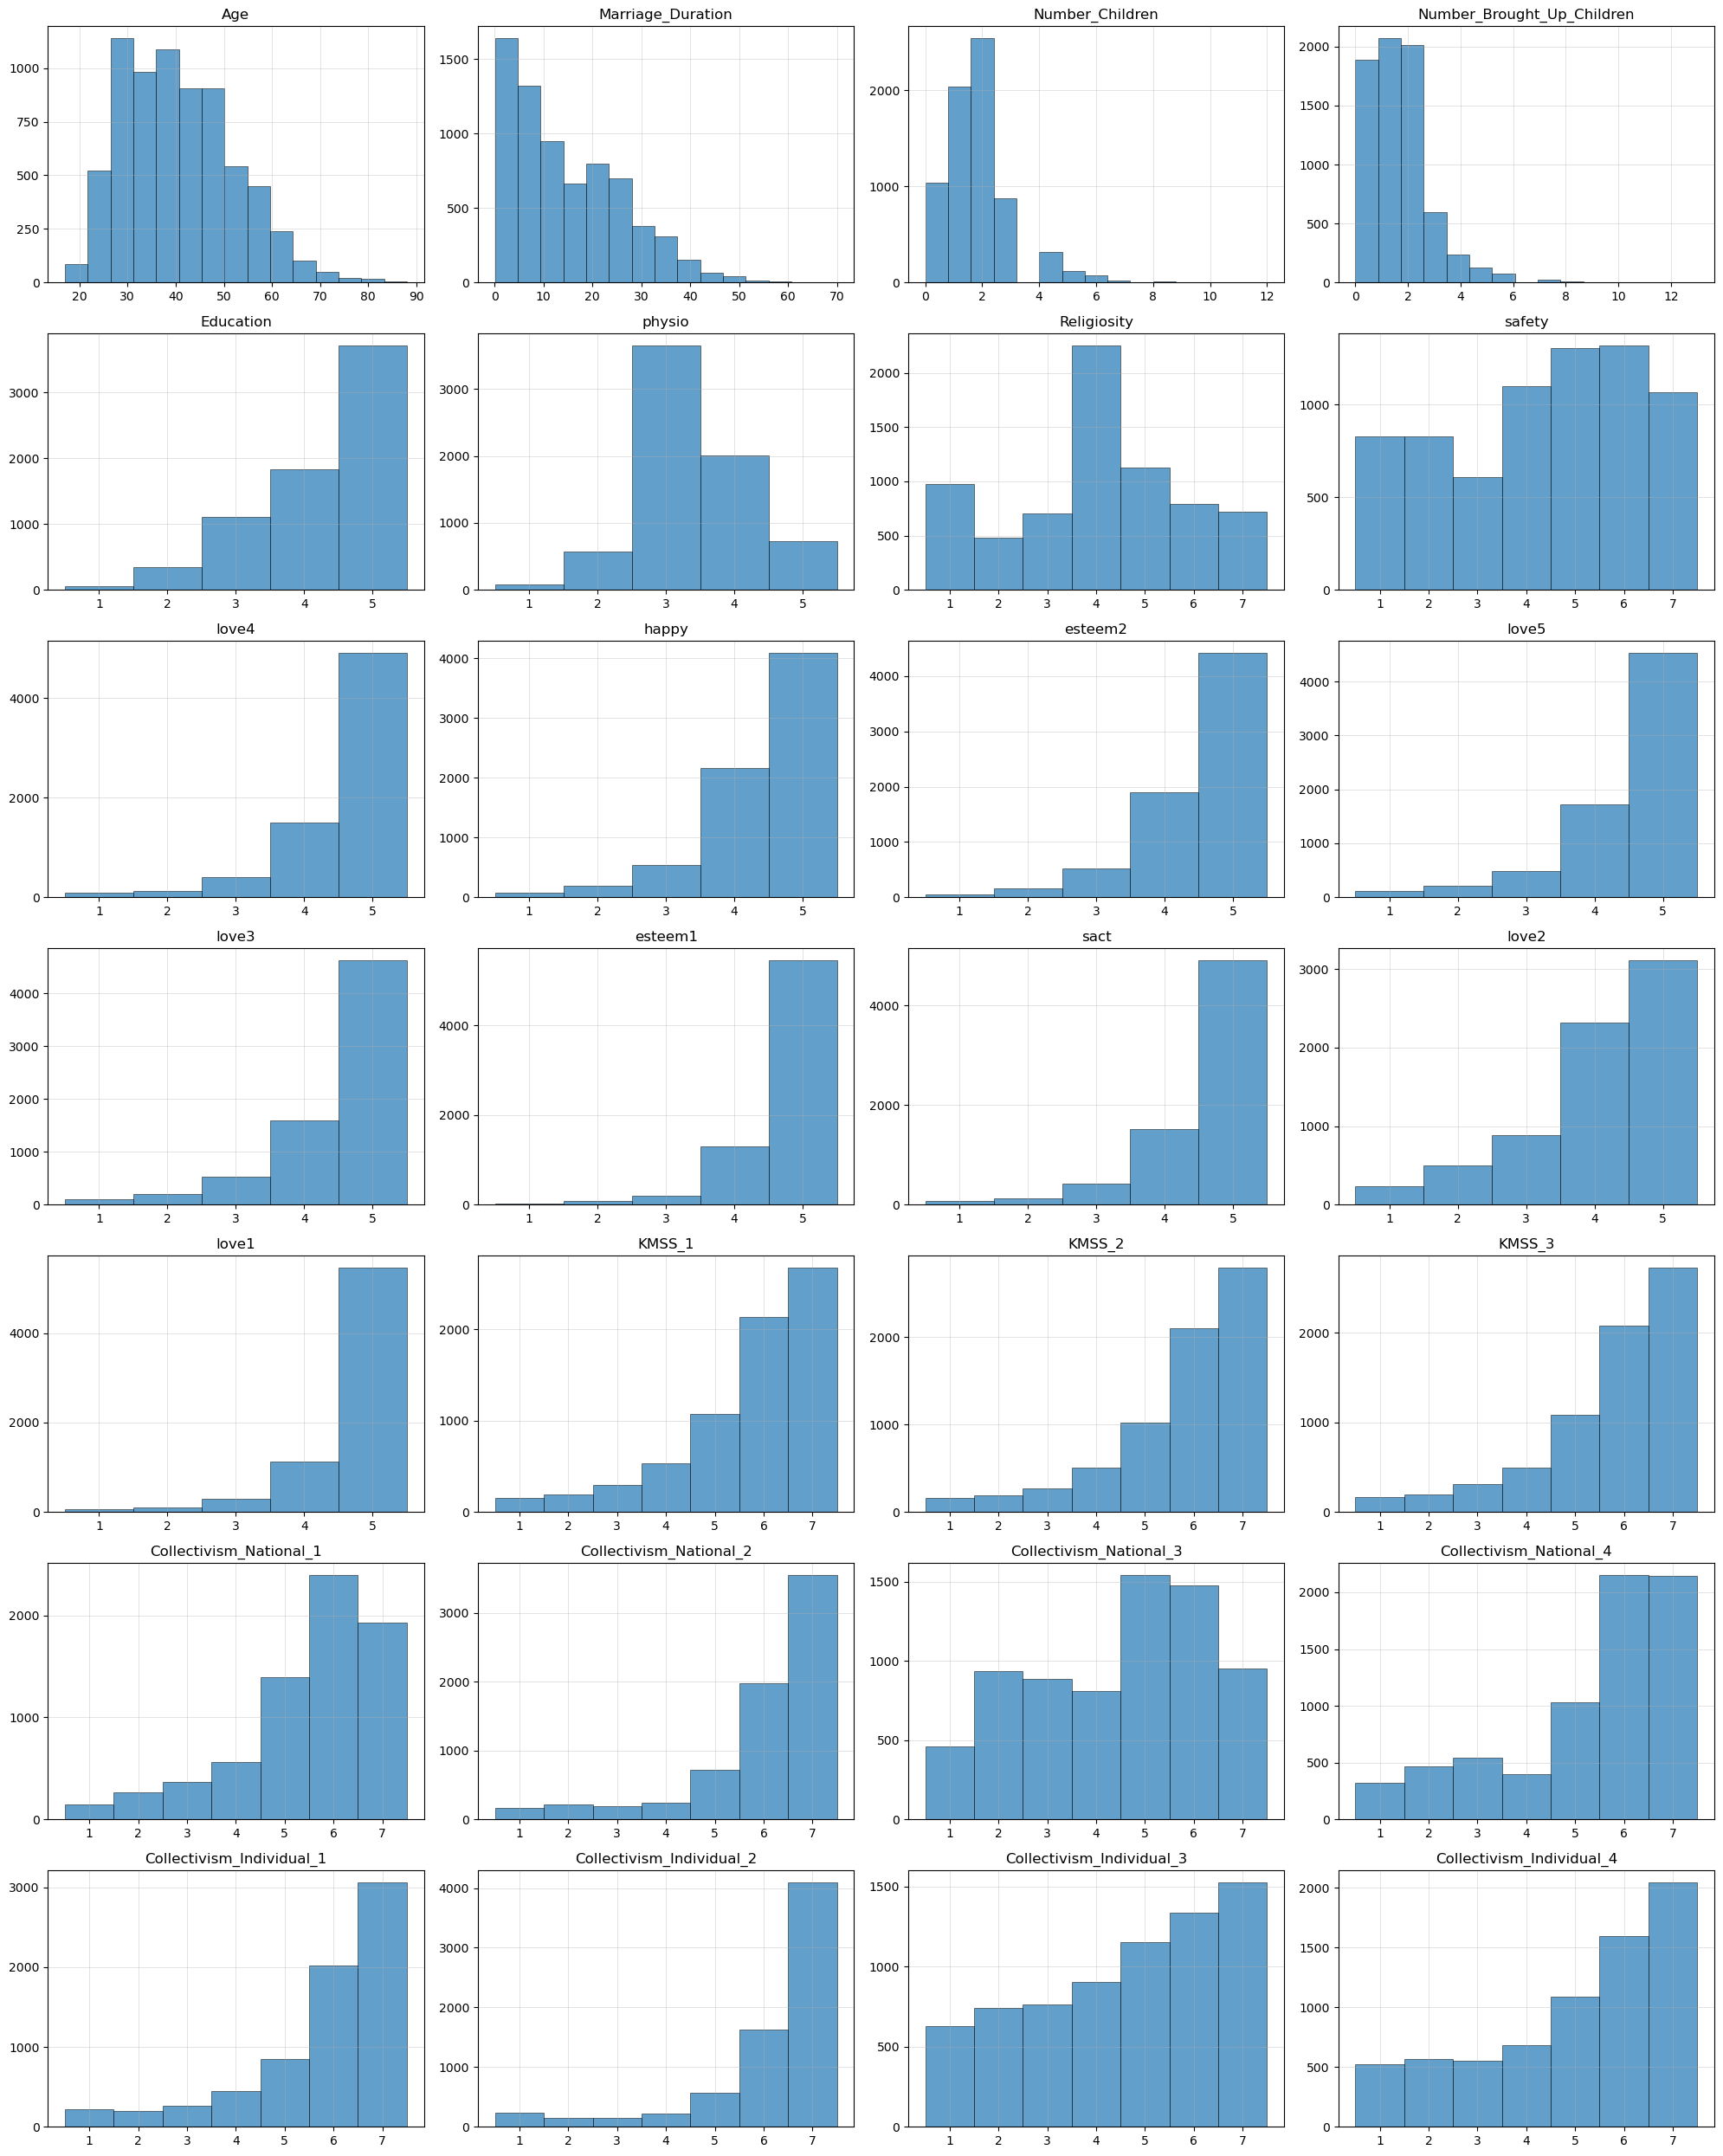

In [8]:
# Histograms for numerical features
numerical_cols = [col for col in df_clean.columns if col not in ['Country', 'Sex', 'Religion']]

plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_cols):
    plt.subplot(7, 4, i + 1)
    
    # Get the data range for better axis labeling
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    
    # Set bins and ticks to align properly
    if max_val - min_val <= 10:  # For discrete scales like 1-5, 1-7, etc.
        # Create bins that center bars on integer values
        bin_edges = np.arange(min_val - 0.5, max_val + 1.5, 1)
        plt.hist(df_clean[col], bins=bin_edges, alpha=0.7, edgecolor='black', linewidth=0.5)
        # Set ticks at integer values (centers of bars)
        plt.xticks(range(int(min_val), int(max_val) + 1))
    else:  # For continuous variables like Age
        plt.hist(df_clean[col], bins=15, alpha=0.7, edgecolor='black', linewidth=0.5)
        plt.locator_params(axis='x', nbins=8)
    
    plt.title(col)
    plt.grid(True, alpha=0.5, linestyle='-', linewidth=0.5)
    plt.locator_params(axis='y', nbins=5)

plt.tight_layout()
plt.show()

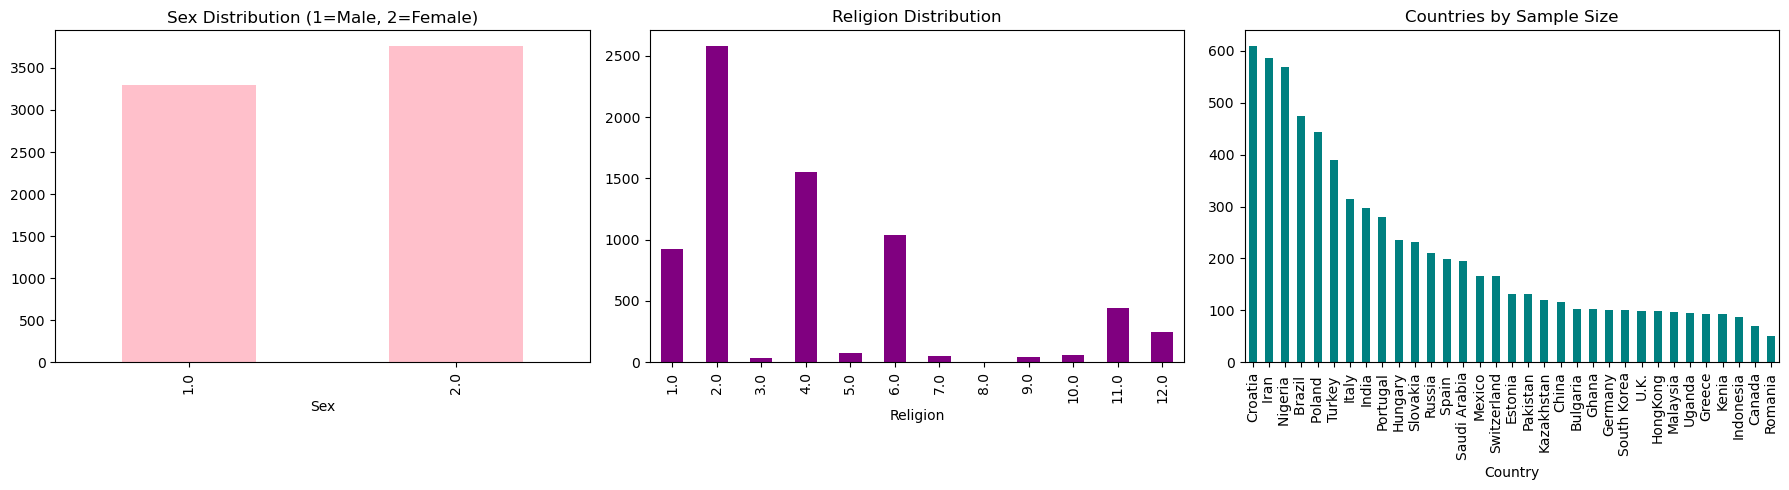

In [9]:
# 2.1.3 Bar Charts for nominal Categorical Features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sex distribution
df_clean['Sex'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='pink')
axes[0].set_title('Sex Distribution (1=Male, 2=Female)')

# Religion distribution  
df_clean['Religion'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Religion Distribution')

# Country distribution (top 15)
df_clean['Country'].value_counts().plot(kind='bar', ax=axes[2], color='teal')
axes[2].set_title('Countries by Sample Size')

plt.tight_layout()
plt.show()

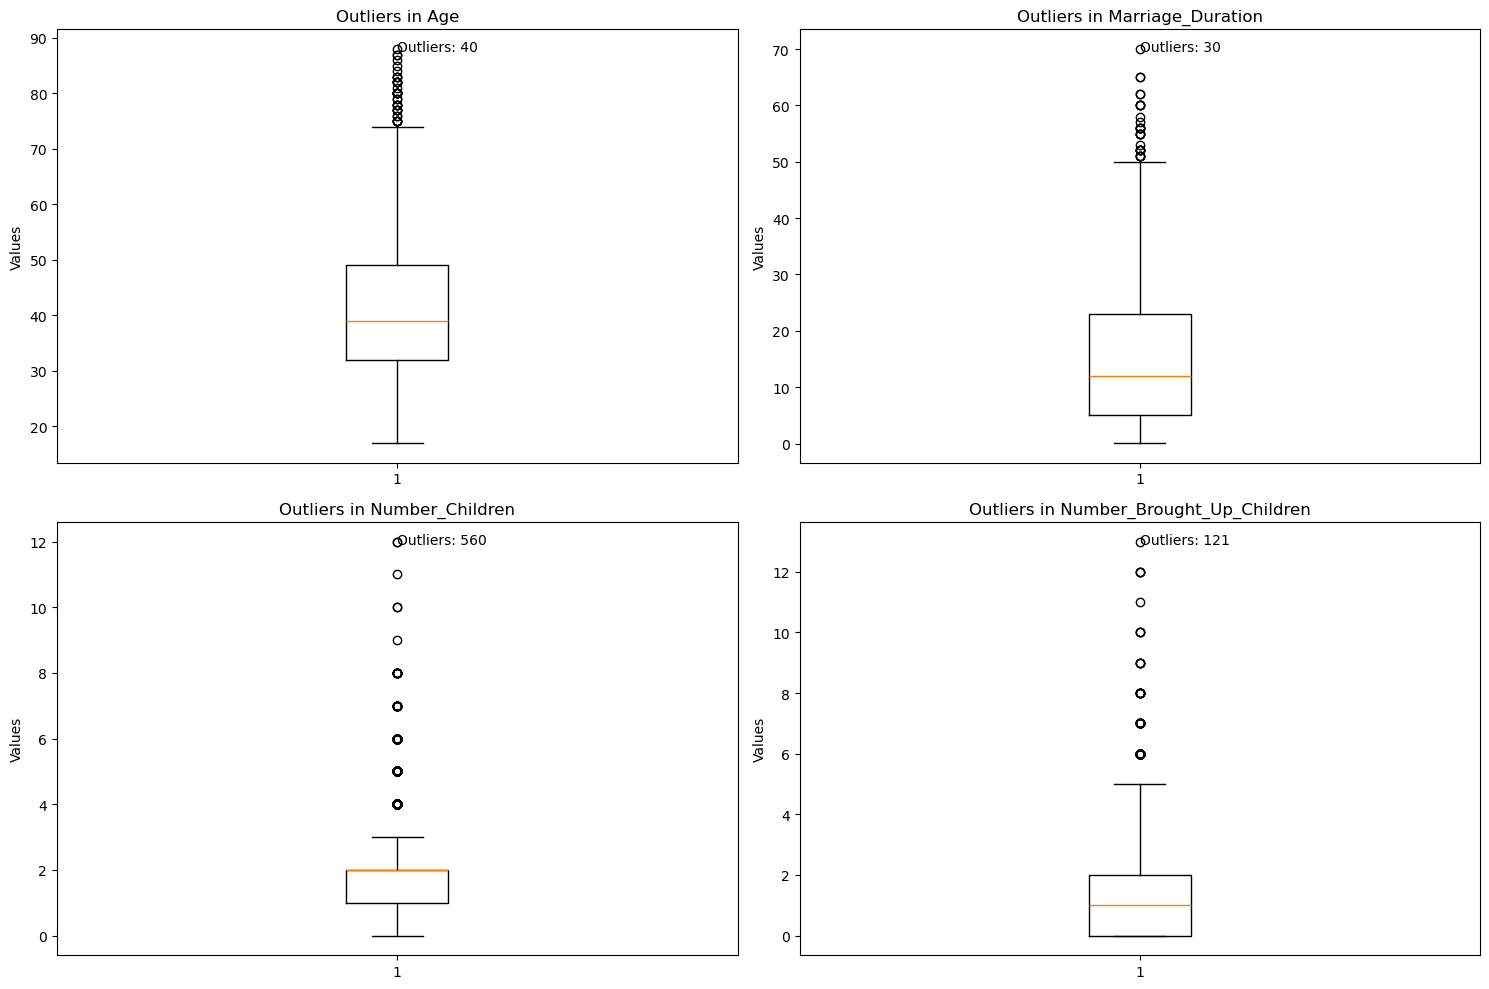

In [10]:
# Simple boxplots to SEE outliers
plt.figure(figsize=(15, 10))

# Check numerical variables for outliers
numerical_vars = ['Age', 'Marriage_Duration', 'Number_Children', 'Number_Brought_Up_Children']

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df_clean[var])
    plt.title(f'Outliers in {var}')
    plt.ylabel('Values')
    
    # Count outliers
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)]
    plt.text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [11]:
# 2.2.1 Relationship Strength Analysis - Features vs Satisfaction Outcomes

# Select numerical variables for analysis
# We exclude nominal categorical variables like Country, Sex, and Religion as they are not suitable for correlation.
numerical_variables = df_clean.select_dtypes(include=[np.number]).columns
excluded_categories = ['Country', 'Sex', 'Religion']
analysis_features = [col for col in numerical_variables if col not in excluded_categories]

# Calculate the Spearman correlation matrix

correlation_matrix = df_clean[analysis_features].corr(method='spearman')

#  Isolate the satisfaction outcome variables
satisfaction_outcomes = ['KMSS_1', 'KMSS_2', 'KMSS_3']

# Extract the correlations of all features with the satisfaction outcomes
outcome_correlations = correlation_matrix[satisfaction_outcomes].drop(index=satisfaction_outcomes)

# To avoid redundancy, remove any other KMSS items from the feature list
outcome_correlations = outcome_correlations.loc[~outcome_correlations.index.str.startswith('KMSS')]

# Rank the results by the average absolute correlation for clear interpretation
outcome_correlations['mean_strength'] = outcome_correlations.abs().mean(axis=1)
ranked_results = outcome_correlations.sort_values('mean_strength', ascending=False).drop(columns='mean_strength')

# Present the final, ranked correlation table
print("--- Bivariate Analysis: Correlation Table ---")
print("Feature correlations with satisfaction measures (ranked by overall strength):")
print("="*80)
display(ranked_results.round(2))

--- Bivariate Analysis: Correlation Table ---
Feature correlations with satisfaction measures (ranked by overall strength):


,KMSS_1,KMSS_2,KMSS_3
sact,0.51,0.53,0.52
love2,0.51,0.51,0.53
happy,0.51,0.51,0.51
love4,0.50,0.49,0.50
love1,0.49,0.50,0.49
esteem2,0.49,0.50,0.49
love5,0.46,0.46,0.46
love3,0.45,0.46,0.46
esteem1,0.42,0.43,0.43
physio,0.15,0.14,0.15


--- Chart Set 1: All Suitable Main Demographic and Ordinal Variables ---


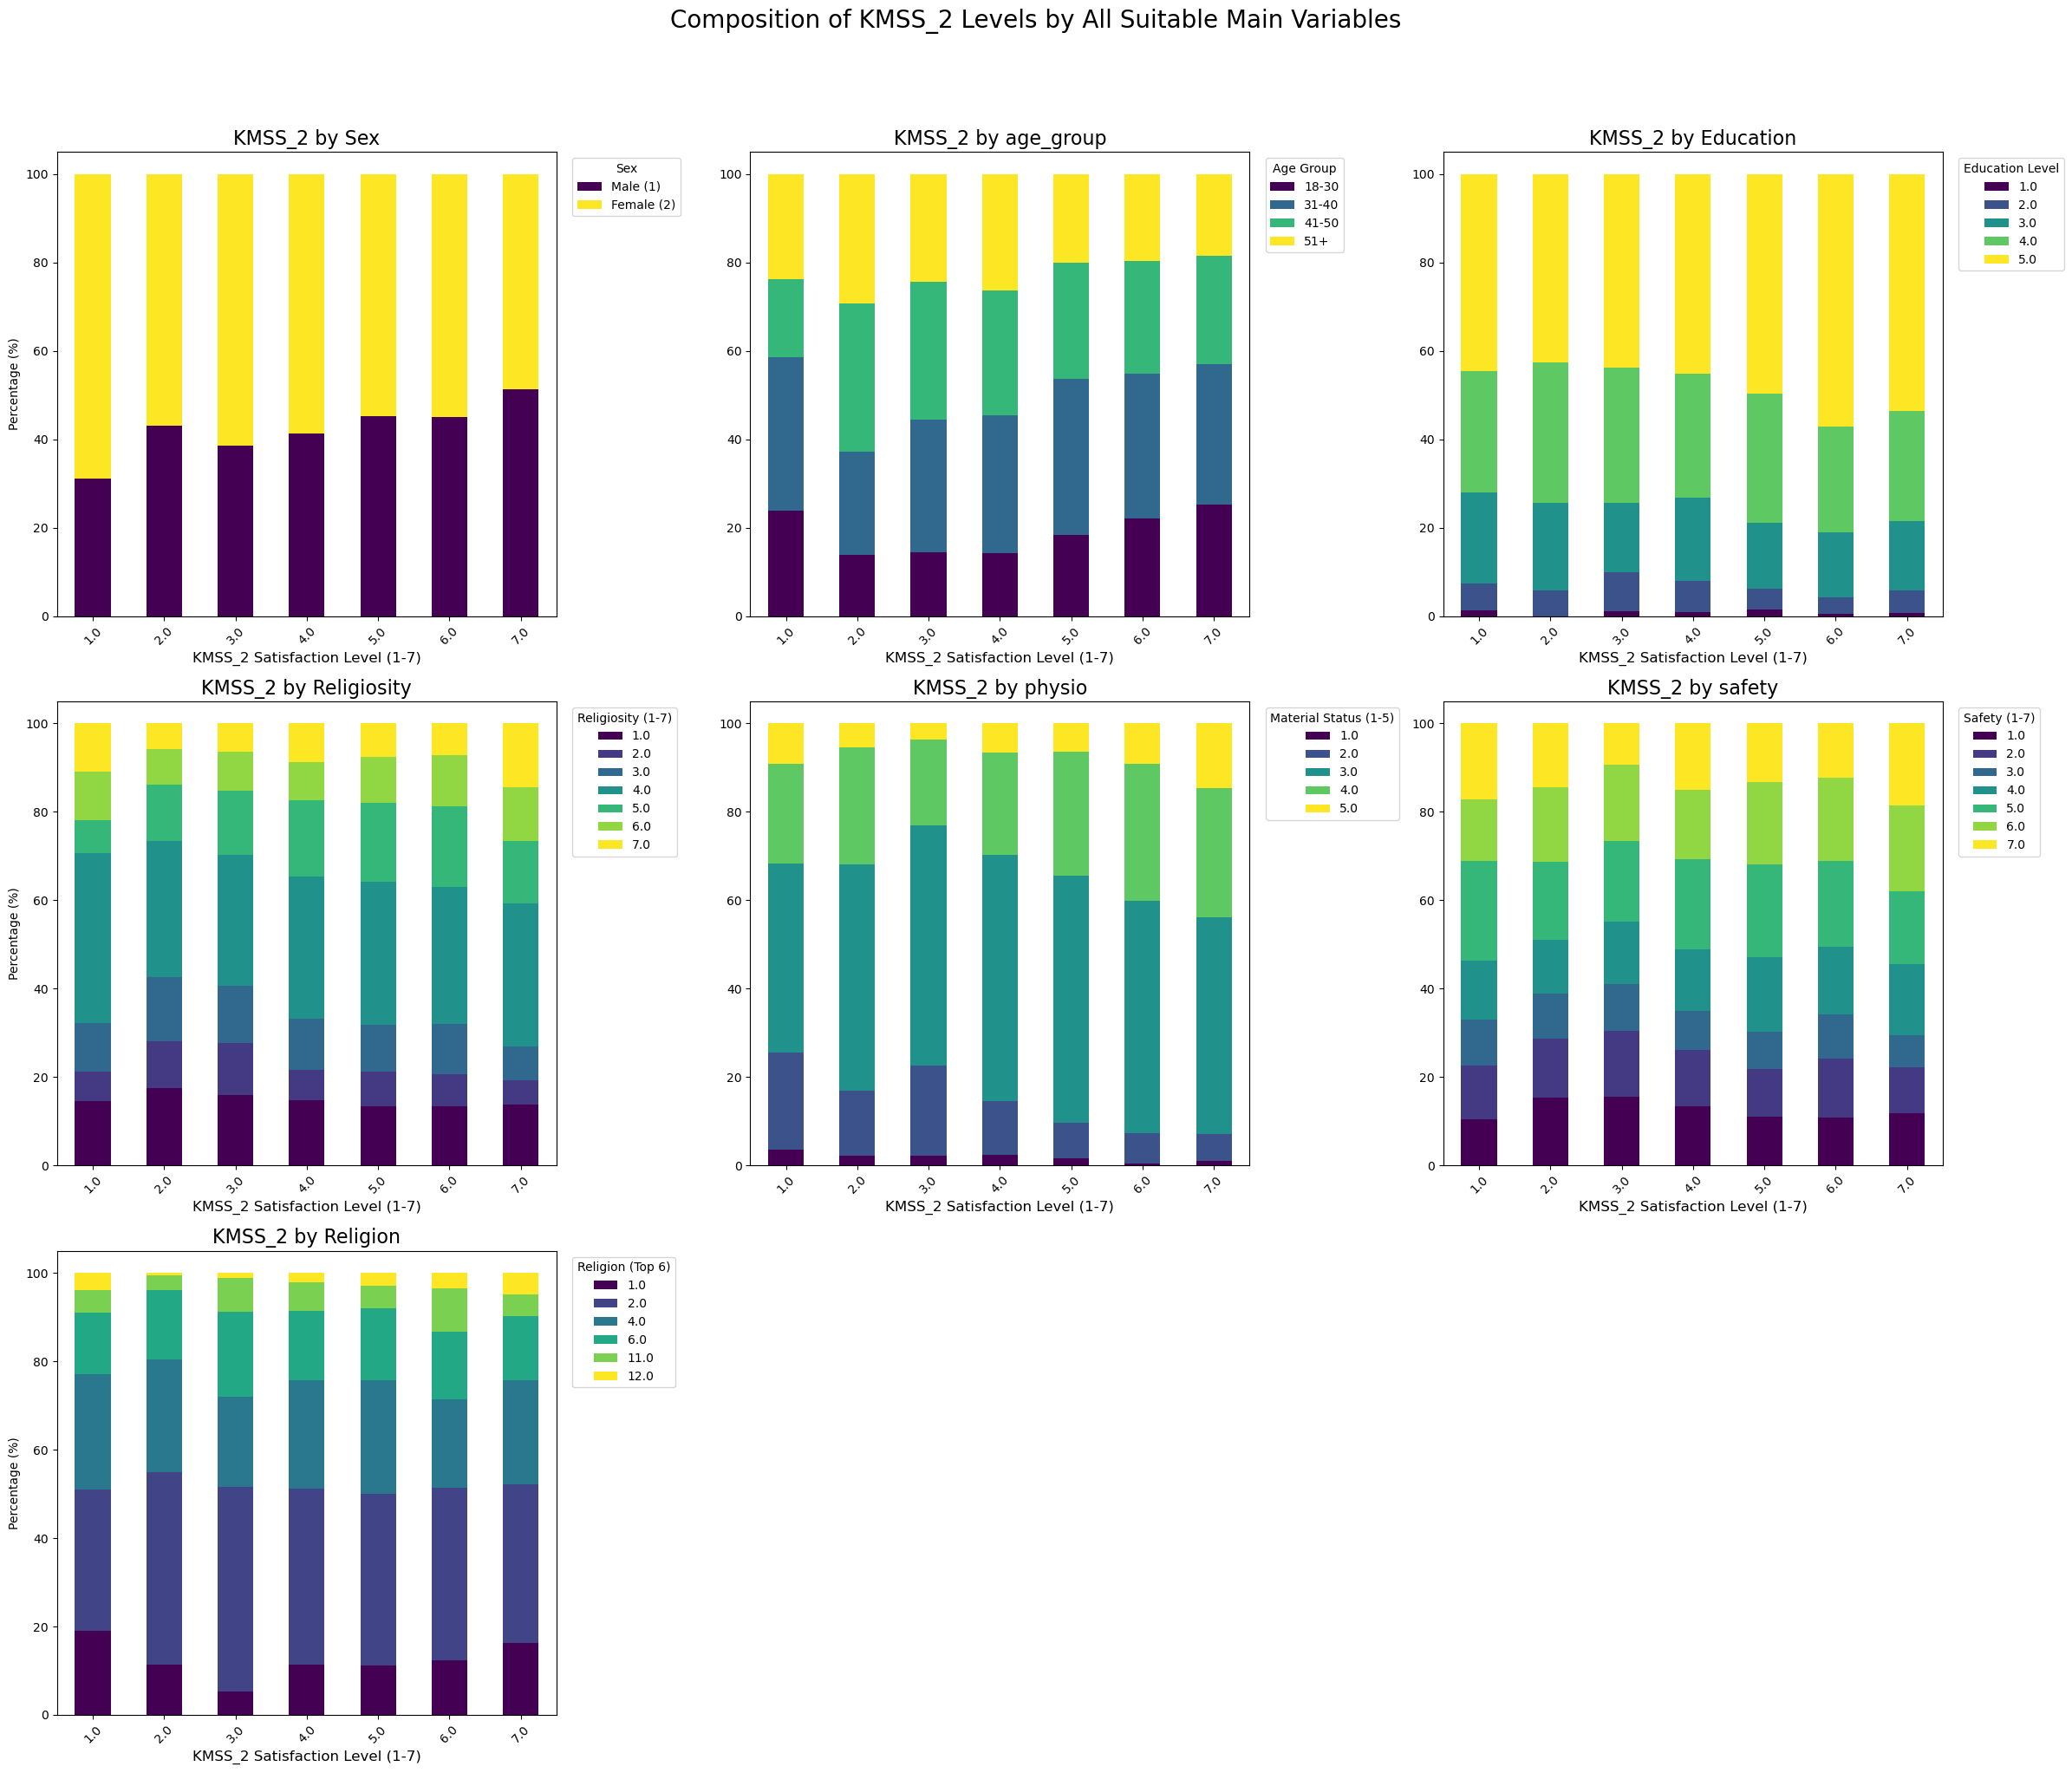

In [12]:
# 2.2.2.1 Analysis of All Suitable Main Variables

print("--- Chart Set 1: All Suitable Main Demographic and Ordinal Variables ---")

# --- Step 1: Create Helper Columns (TEMPORARY - don't modify df_clean) ---
# Create temporary dataframe with age_group helper column
df_temp = df_clean.copy()
df_temp['age_group'] = pd.cut(df_temp['Age'], bins=[17, 30, 40, 50, 100], labels=['18-30', '31-40', '41-50', '51+'])

# Filter for the top 6 most common religions to keep the 'Religion' chart readable
top_6_religions = df_clean['Religion'].value_counts().head(6).index
df_filtered_religion = df_clean[df_clean['Religion'].isin(top_6_religions)]


# --- Step 2: Define the plots for a 3x3 grid ---
# This dictionary now includes 'Religion'.
plot_vars = [
    {'col': 'Sex', 'legend_title': 'Sex', 'labels': ['Male (1)', 'Female (2)']},
    {'col': 'age_group', 'legend_title': 'Age Group'},
    {'col': 'Education', 'legend_title': 'Education Level'},
    {'col': 'Religiosity', 'legend_title': 'Religiosity (1-7)'},
    {'col': 'physio', 'legend_title': 'Material Status (1-5)'},
    {'col': 'safety', 'legend_title': 'Safety (1-7)'},
    {'col': 'Religion', 'legend_title': 'Religion (Top 6)', 'data': df_filtered_religion} # Use filtered data for this chart
]

# --- Step 3: Create the 3x3 Grid of Charts ---
fig, axes = plt.subplots(3, 3, figsize=(24, 20))
axes = axes.ravel() # Flatten the grid to make looping easy
fig.suptitle('Composition of KMSS_2 Levels by All Suitable Main Variables', fontsize=20, y=1.02)


# --- Step 4: Loop through the plot configurations and create each chart ---
for i, config in enumerate(plot_vars):
    ax = axes[i]
    col_name = config['col']
    
    # Use the appropriate dataframe (temp for age_group, filtered for Religion, clean for others)
    if col_name == 'age_group':
        data_source = df_temp  # Use temp dataframe for age_group
    else:
        data_source = config.get('data', df_clean)
    
    crosstab_data = pd.crosstab(data_source['KMSS_2'], data_source[col_name], normalize='index') * 100
    crosstab_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
    
    # Formatting
    ax.set_title(f'KMSS_2 by {col_name}', fontsize=16)
    ax.set_ylabel('Percentage (%)' if i % 3 == 0 else '')
    ax.set_xlabel('KMSS_2 Satisfaction Level (1-7)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    legend_labels = config.get('labels')
    legend = ax.legend(title=config['legend_title'], bbox_to_anchor=(1.02, 1), loc='upper left')
    if legend_labels:
        for j, text in enumerate(legend.get_texts()):
            text.set_text(legend_labels[j])

# --- Step 5: Hide the unused subplots ---
# We have 7 plots on a 9-slot grid, so we hide the last two.
for i in range(len(plot_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


--- Chart Set 2: All MRQ (Relationship Quality) Items ---


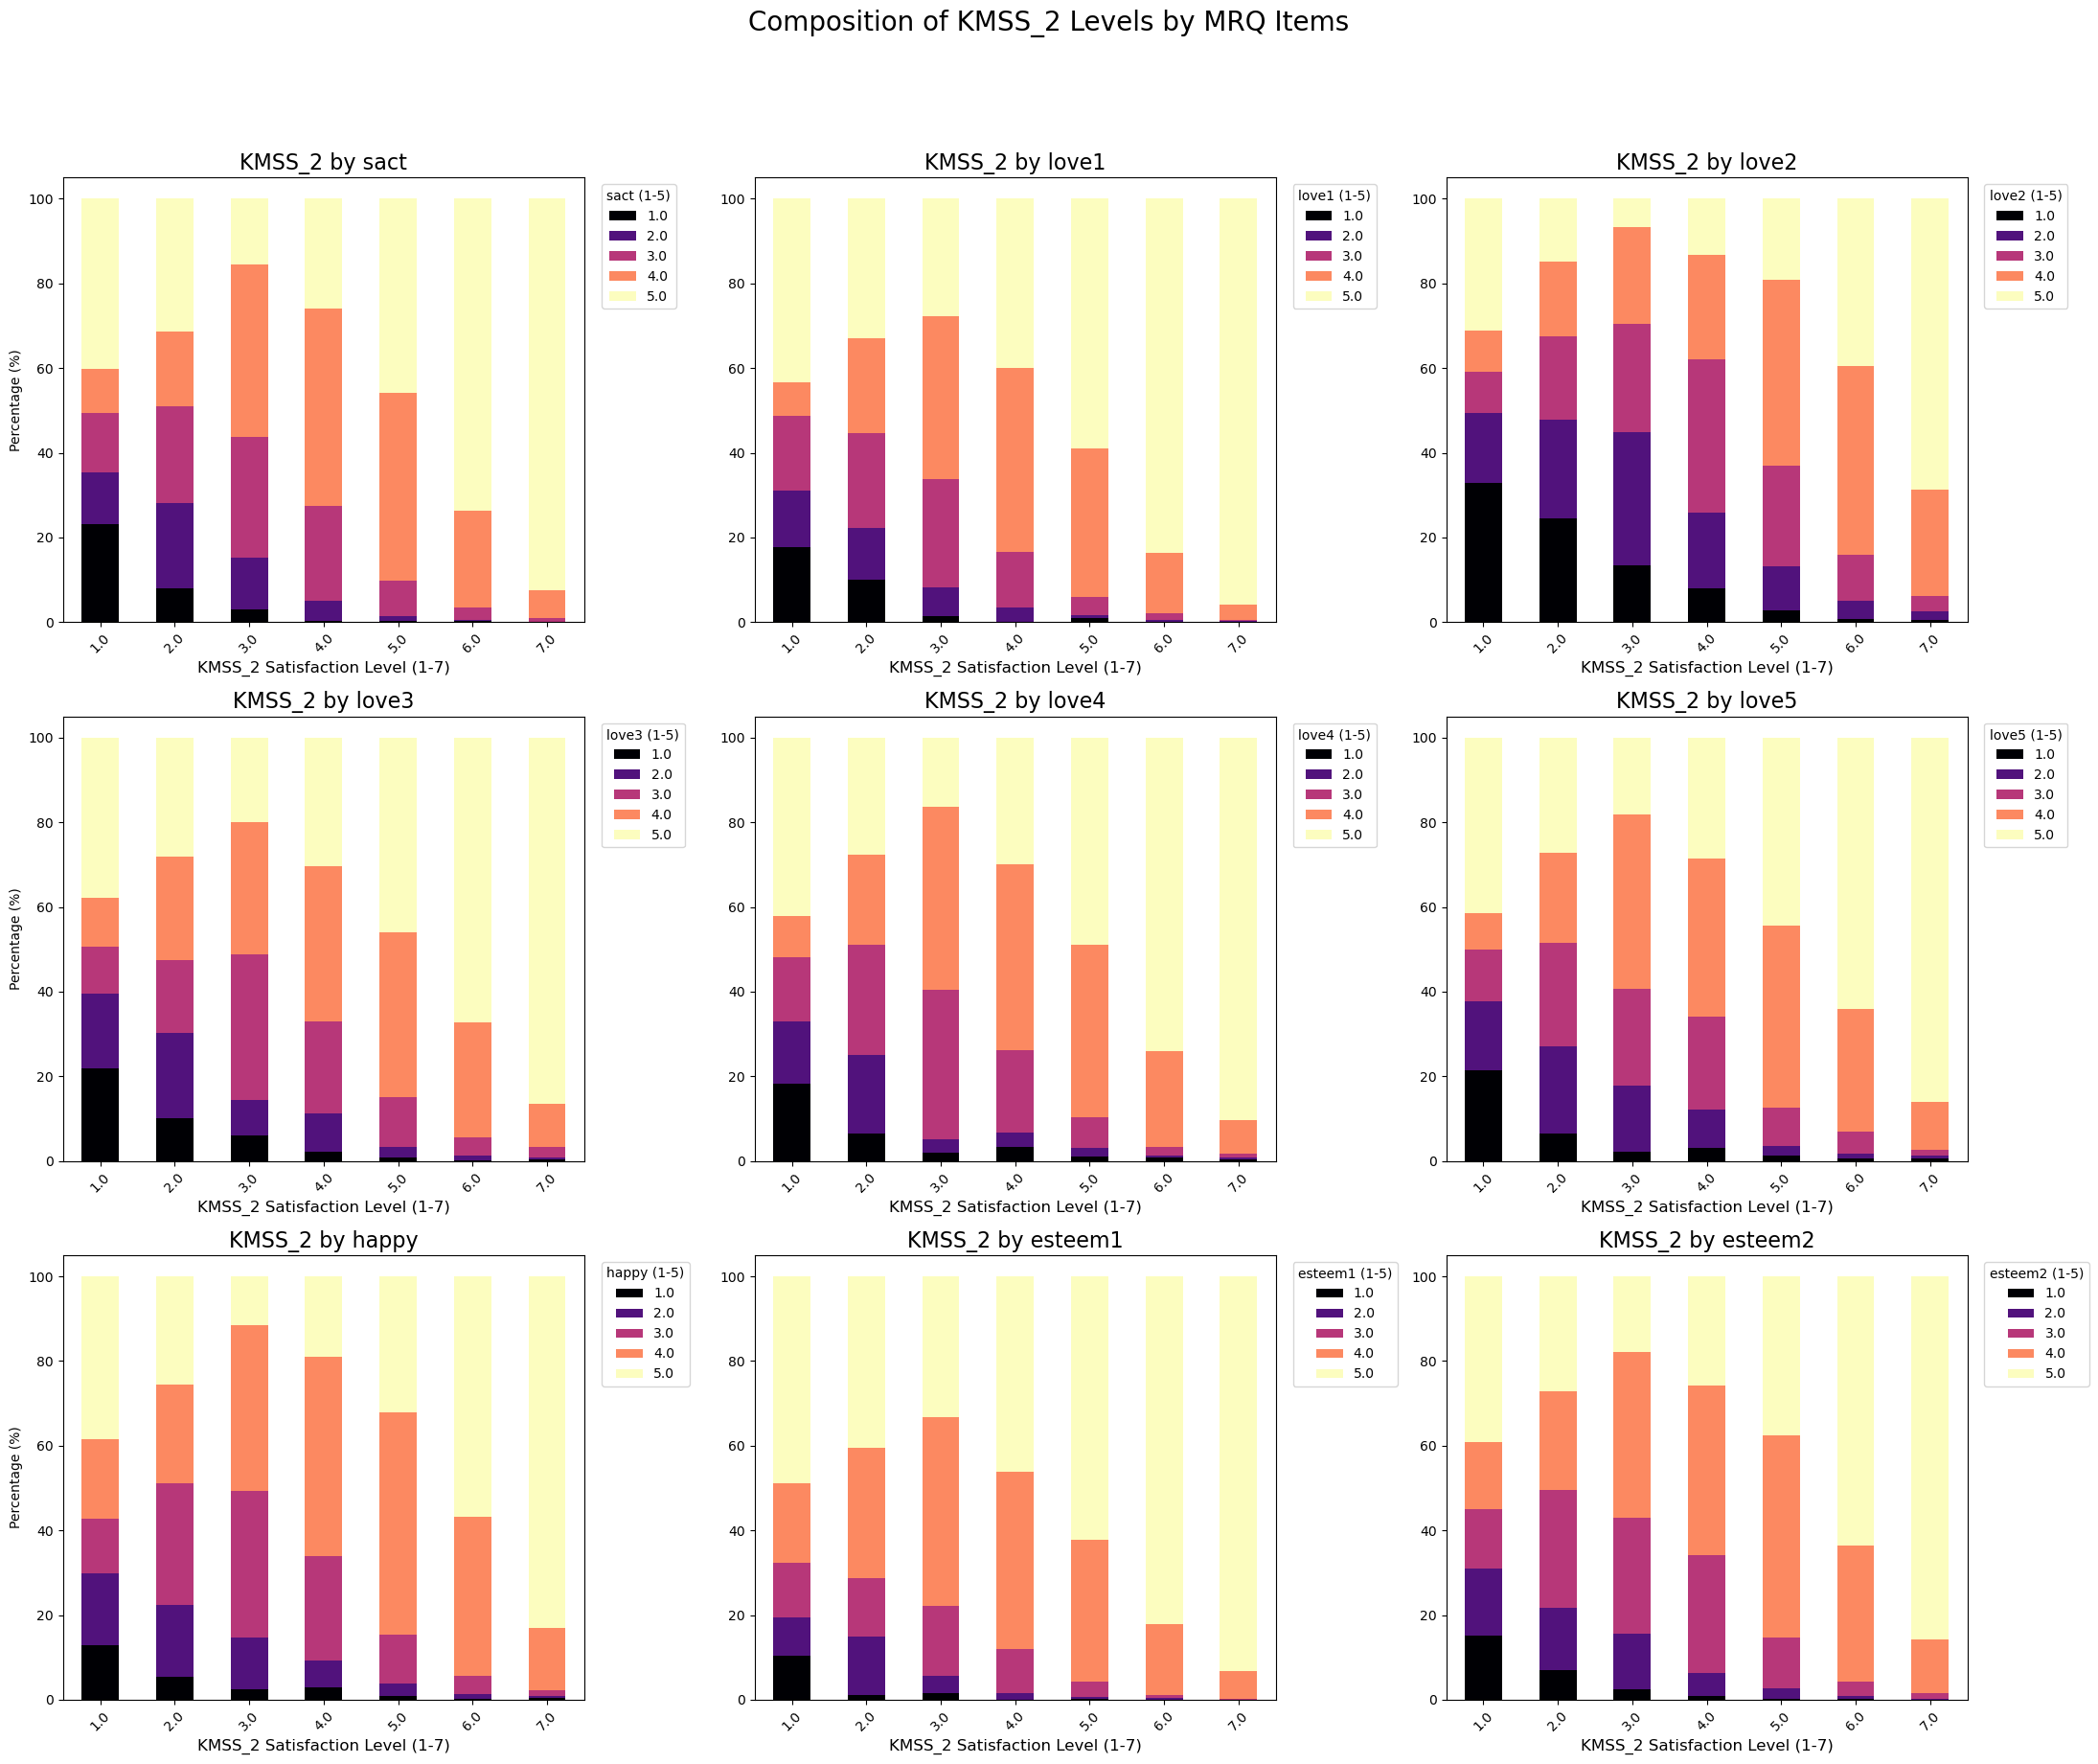

In [13]:
# 2.2.2.2 Analysis of All MRQ (Relationship Quality) Items 
print("--- Chart Set 2: All MRQ (Relationship Quality) Items ---")

mrq_cols = ['sact', 'love1', 'love2', 'love3', 'love4', 'love5', 'happy', 'esteem1', 'esteem2']

fig, axes = plt.subplots(3, 3, figsize=(22, 18))
axes = axes.ravel()
fig.suptitle('Composition of KMSS_2 Levels by MRQ Items', fontsize=20, y=1.02)

for i, col in enumerate(mrq_cols):
    ax = axes[i]
    crosstab_data = pd.crosstab(df_clean['KMSS_2'], df_clean[col], normalize='index') * 100
    crosstab_data.plot(kind='bar', stacked=True, ax=ax, colormap='magma')
    
    # Formatting
    ax.set_title(f'KMSS_2 by {col}', fontsize=16)
    ax.set_ylabel('Percentage (%)' if i % 3 == 0 else '')
    ax.set_xlabel('KMSS_2 Satisfaction Level (1-7)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    ax.legend(title=f'{col} (1-5)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

--- Chart Set 3: All Collectivism Items ---


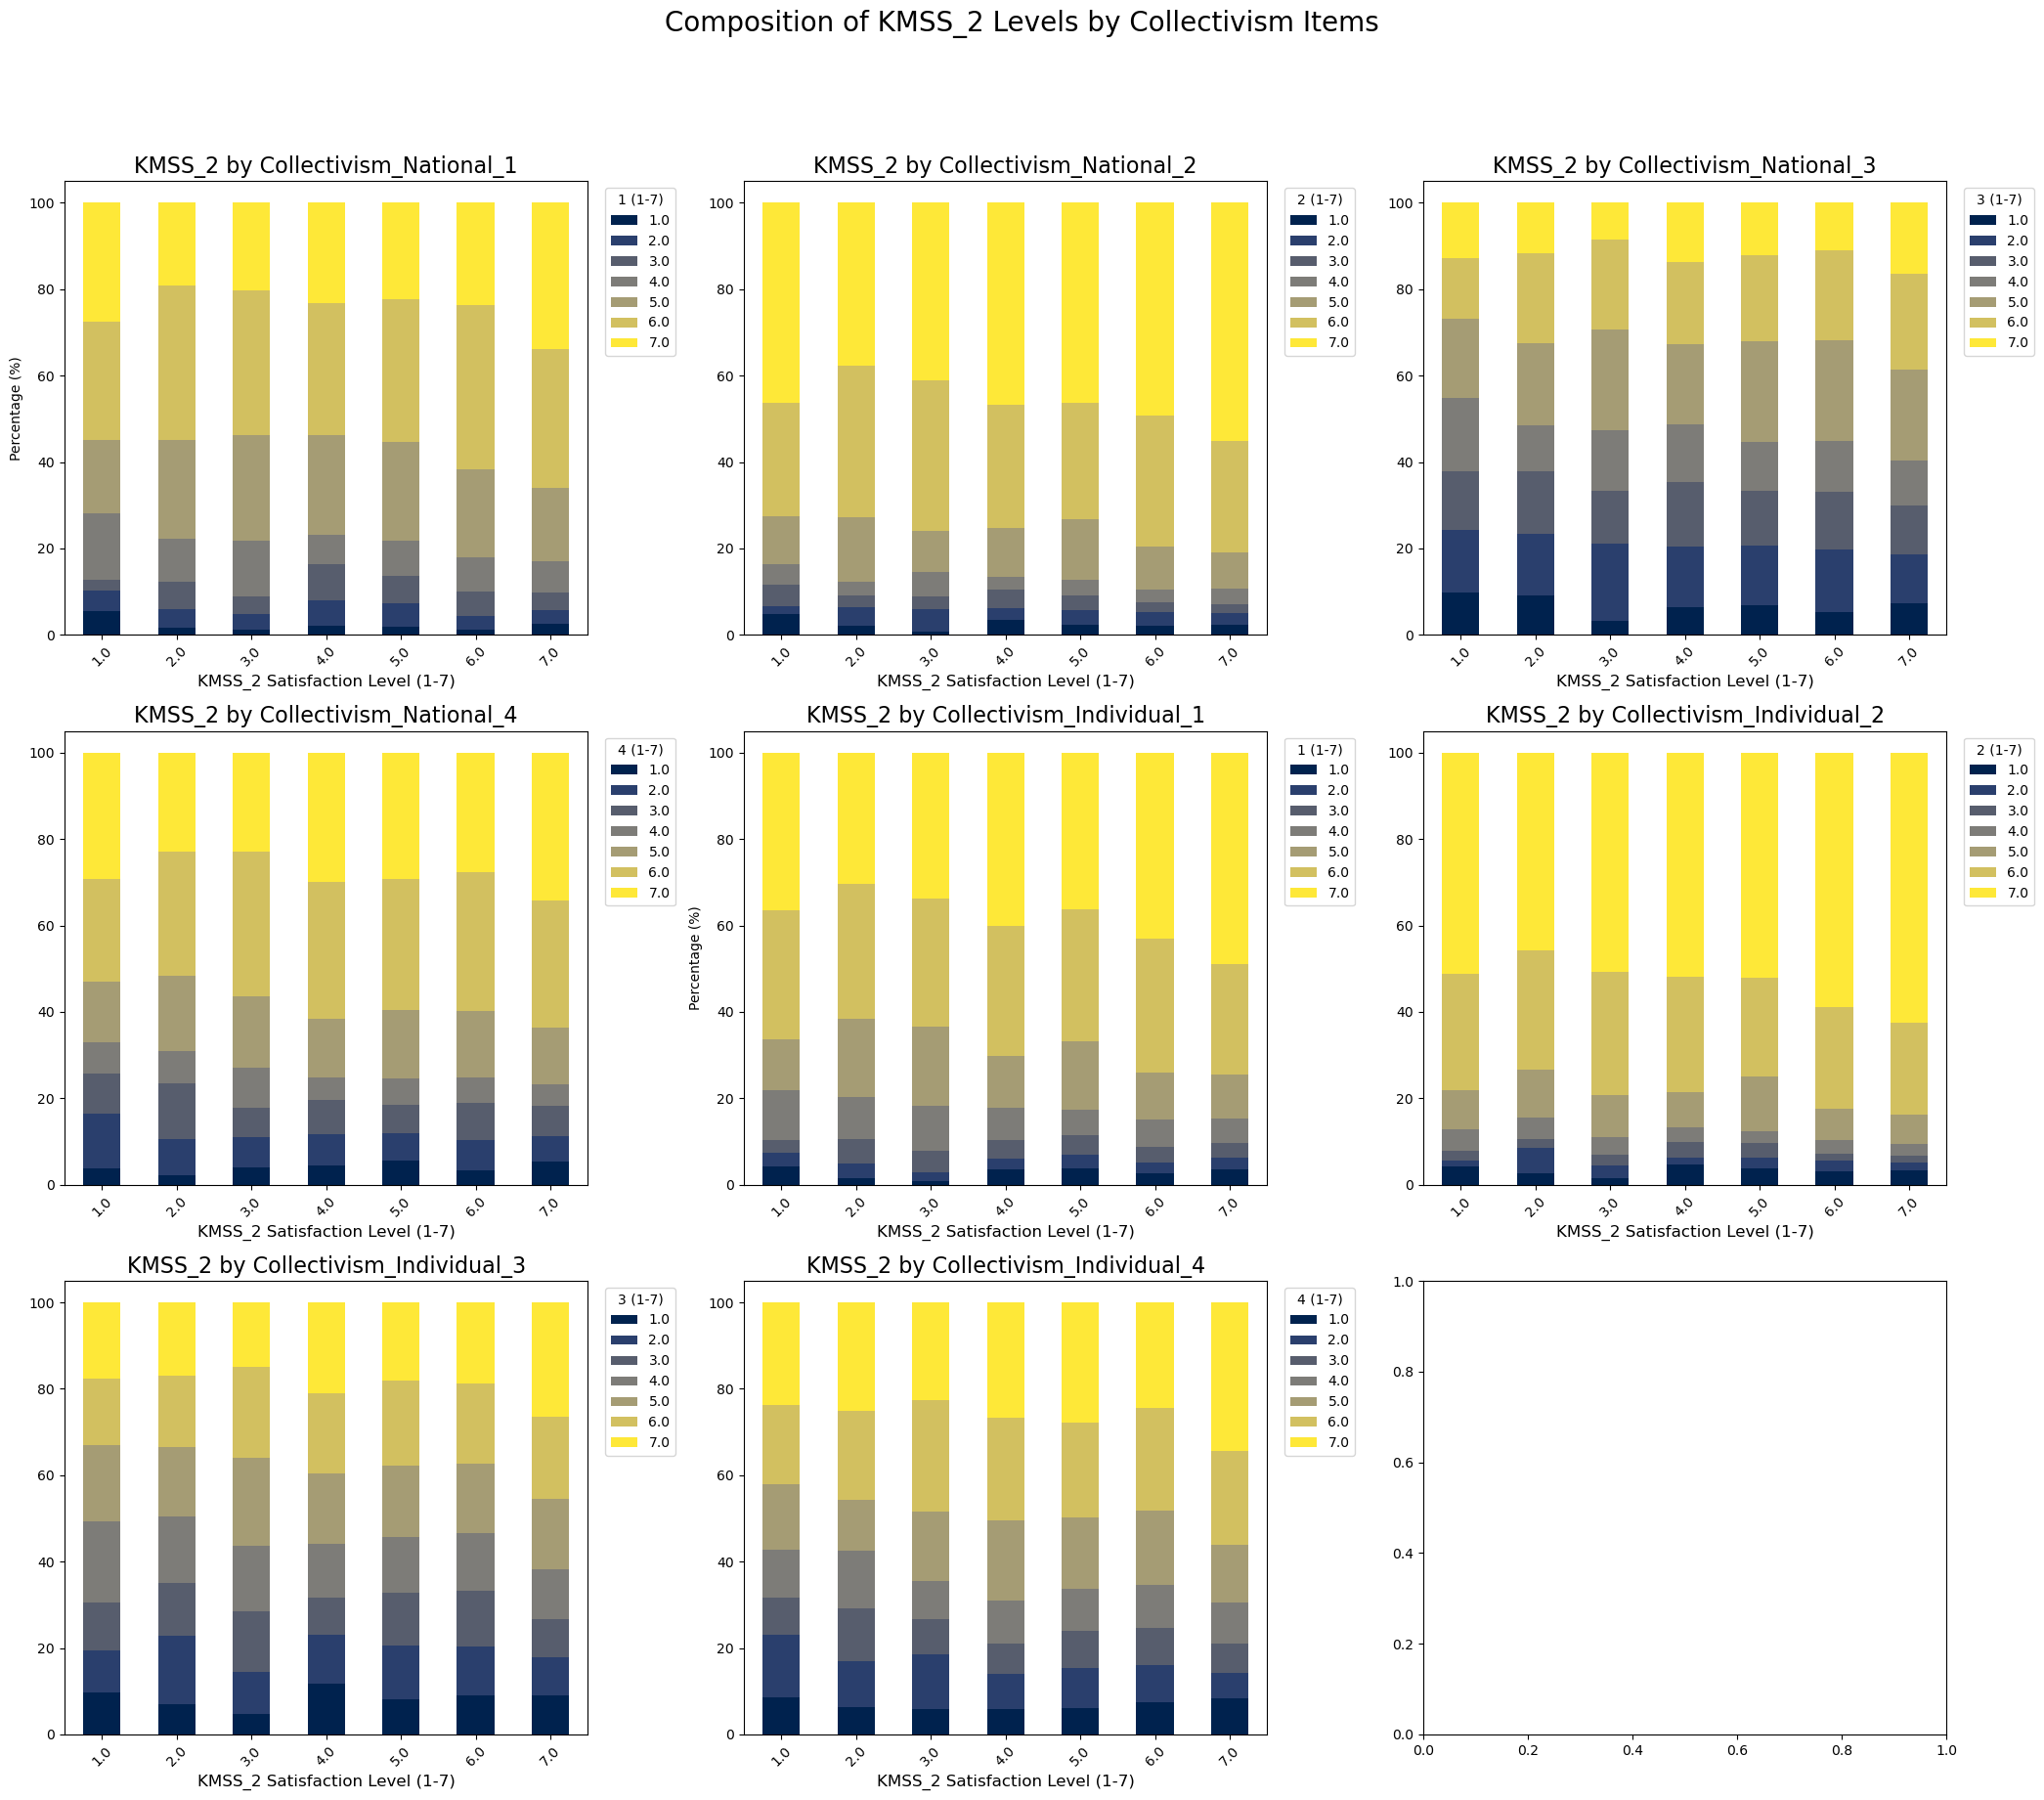

In [14]:
# 2.2.2.3 Analysis of All Collectivism Items 
print("--- Chart Set 3: All Collectivism Items ---")

collectivism_cols = [f'Collectivism_National_{i}' for i in range(1, 5)] + [f'Collectivism_Individual_{i}' for i in range(1, 5)]

fig, axes = plt.subplots(3, 3, figsize=(21, 18))
axes = axes.ravel()
fig.suptitle('Composition of KMSS_2 Levels by Collectivism Items', fontsize=20, y=1.02)

for i, col in enumerate(collectivism_cols):
    ax = axes[i]
    crosstab_data = pd.crosstab(df_clean['KMSS_2'], df_clean[col], normalize='index') * 100
    crosstab_data.plot(kind='bar', stacked=True, ax=ax, colormap='cividis')
    
    # Formatting
    ax.set_title(f'KMSS_2 by {col}', fontsize=16)
    ax.set_ylabel('Percentage (%)' if i == 0 or i == 4 else '')
    ax.set_xlabel('KMSS_2 Satisfaction Level (1-7)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)


    ax.legend(title=f'{col.split("_")[-1]} (1-7)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

=== 3-VARIABLE CLUSTER ANALYSIS: RELATIONSHIP QUALITY PATTERNS ===
Variables: Self-actualization, Love Quality, Love Connection
Objective: Discover relationship quality archetypes

Data: 7051 complete observations

Cluster Profiles:
                       sact  love2  love1  KMSS_2
Relationship_Cluster                             
0                     2.859  2.269  2.946   3.496
1                     4.964  4.689  4.988   6.335
2                     4.234  3.296  4.534   5.247

Cluster Profiles:
                       sact  love2  love1  KMSS_2
Relationship_Cluster                             
0                     2.859  2.269  2.946   3.496
1                     4.964  4.689  4.988   6.335
2                     4.234  3.296  4.534   5.247


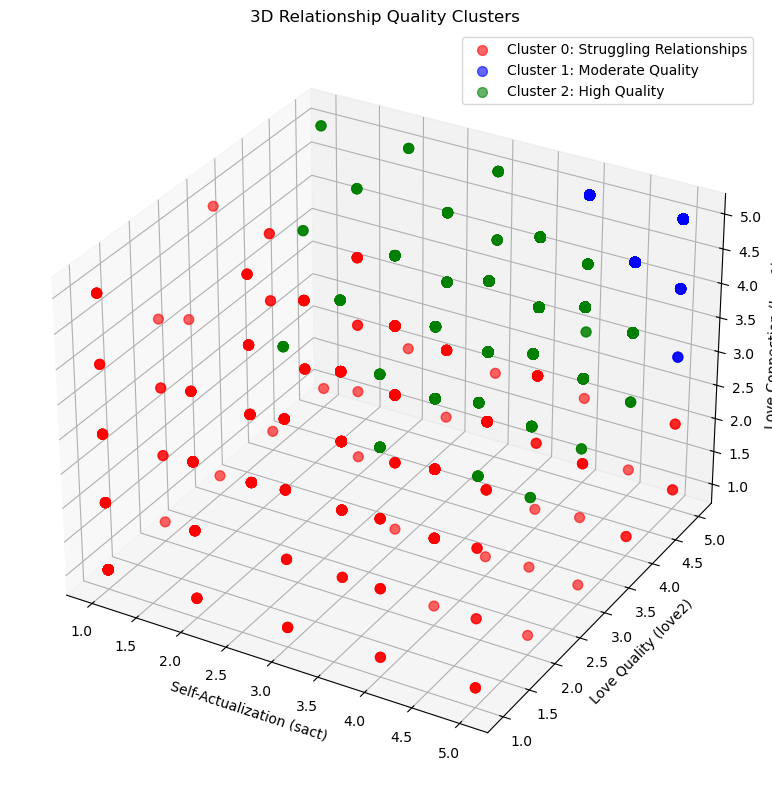


Satisfaction by Relationship Quality Cluster:
                       mean    std  count
Relationship_Cluster                     
0                     3.496  1.642    629
1                     6.335  1.059   4395
2                     5.247  1.251   2027


In [15]:
# 2.2.3-Multivariate Cluster Analysis: Pure Relationship Quality
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

print("=== 3-VARIABLE CLUSTER ANALYSIS: RELATIONSHIP QUALITY PATTERNS ===")

# Select pure relationship quality variables
cluster_vars = ['sact', 'love2', 'love1']
print(f"Variables: Self-actualization, Love Quality, Love Connection")
print(f"Objective: Discover relationship quality archetypes")

# Prepare data
X = df_clean[cluster_vars].dropna()
print(f"\nData: {len(X)} complete observations")

# Standardize for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply clustering (likely 3-4 clusters optimal)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Create temporary dataframe for analysis (DON'T modify df_clean)
df_cluster_temp = df_clean.copy()
df_cluster_temp['Relationship_Cluster'] = cluster_labels

# Analyze cluster profiles using temporary dataframe
cluster_profiles = df_cluster_temp.groupby('Relationship_Cluster')[cluster_vars + ['KMSS_2']].mean()
print(f"\nCluster Profiles:")
print("=" * 60)
print(cluster_profiles.round(3))

# Create 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters with different colors
colors = ['red', 'blue', 'green']
cluster_names = ['Struggling Relationships', 'Moderate Quality', 'High Quality']

for i in range(3):
    mask = cluster_labels == i
    ax.scatter(X[mask]['sact'], X[mask]['love2'], X[mask]['love1'], 
              c=colors[i], label=f'Cluster {i}: {cluster_names[i]}', alpha=0.6, s=50)

ax.set_xlabel('Self-Actualization (sact)')
ax.set_ylabel('Love Quality (love2)')
ax.set_zlabel('Love Connection (love1)')
ax.set_title('3D Relationship Quality Clusters')
ax.legend()

plt.tight_layout()
plt.show()

# Analyze satisfaction by cluster (using temporary dataframe)
satisfaction_by_cluster = df_cluster_temp.groupby('Relationship_Cluster')['KMSS_2'].agg(['mean', 'std', 'count'])
print(f"\nSatisfaction by Relationship Quality Cluster:")
print("=" * 60)
print(satisfaction_by_cluster.round(3))

---
# Section 3: Feature Engineering

## Overview
This section implements comprehensive feature engineering to address key challenges identified in the EDA and prepare the dataset for machine learning modeling. The implementation follows 4 distinct types of feature engineering to meet project requirements and optimize model performance.

## Challenges Identified in EDA:
- **Severe class imbalance** in KMSS_2 (heavily skewed toward satisfaction levels 6-7)
- **Mixed data scales** requiring normalization (continuous vs ordinal variables)
- **Categorical variables** requiring encoding for ML compatibility
- **Feature selection needs** based on correlation strength with target variables

## 4-Type Feature Engineering Implementation

### TYPE 1: Data Scaling & Normalization
**Objective:** Standardize features with different scales for optimal ML performance

**Implementation:**
- **StandardScaler** for continuous variables (Age, Marriage_Duration, Number_Children, Number_Brought_Up_Children)
  - Applied to variables with wide ranges and approximately normal distributions
- **MinMaxScaler** for ordinal variables (MRQ items, Collectivism scales, Education, Religiosity, physio, safety)
  - Preserves ordinal relationships while normalizing to 0-1 range
  - Applied to bounded scales (1-5, 1-7) maintaining interpretable ordering

### TYPE 2: Categorical Encoding
**Objective:** Convert categorical variables to numeric format for ML algorithms

**Implementation:**
- **Country One-Hot Encoding:** 
  - Transforms 33 countries into binary indicator variables
  - Uses `OneHotEncoder(sparse_output=False, drop='first')` to avoid multicollinearity
  - Creates 32 dummy variables (Country_Argentina, Country_Australia, etc.)
  - Automatically handles the reference category by dropping the first category

### TYPE 3: Target Variable Engineering  
**Objective:** Create multiple target encodings to address class imbalance and enable comprehensive model comparison

**Implementation:**
- **Binary Classification (target_2class):** Unsatisfied (1-4) vs Satisfied (5-7) 
  - Most balanced approach for addressing severe class imbalance
- **Three-Class Classification (target_3class):** Low (1-3), Medium (4-5), High (6-7)
  - Interpretable satisfaction groups using `pd.cut()` with strategic bin boundaries
- **Five-Class Classification (target_5class):** Merges extreme categories for balance
  - Maps original classes: 1-2→1, 3→3, 4→4, 5→5, 6-7→5
  - Reduces severe imbalance while maintaining more granular classification
- **Seven-Class Classification (target_7class):** Original KMSS_2 scale preserved
  - Baseline comparison maintaining original research instrument scaling

### TYPE 4: Correlation-Based Feature Selection
**Objective:** Systematically select features based on EDA correlation analysis and create strategic feature sets

**Implementation:**
- **Feature Ranking:** Uses EDA correlation analysis (`outcome_correlations['KMSS_2'].abs()`) for consistency
- **Excluded Variables:** KMSS_1, KMSS_3, 'happy', original 'Country', and target variables
- **Available Features:** Includes Religion, Sex, scaled variables, and Country dummy variables
- **Correlation Mapping:** 
  - Uses actual EDA correlations for original features
  - Assigns moderate correlation (0.15) for Country dummy variables
  - Default correlation (0.1) for remaining features
- **Feature Sets Created:**
  - **All_Features:** Complete set of ~55 engineered features
  - **Top_10:** Top 10 features by EDA correlation strength
  - **Top_7:** Top 7 features by EDA correlation strength  
  - **Top_5:** Top 5 features by EDA correlation strength
  - **Top_3:** Top 3 core predictors (likely sact, love2, love1 based on EDA)

## Data Persistence and Reproducibility
**Implementation:**
- **Engineered DataFrame:** Saved as `df_engineered_data.csv` for modeling independence
- **Encoders Dictionary:** Stores all preprocessing objects for consistent application:
  - `standard_scaler` and `minmax_scaler` for feature scaling
  - `country_onehot_encoder` and `country_columns` for categorical encoding
  - `correlation_ranking` and `selected_features_by_set` for feature selection
- **Target Variables Dictionary:** Organized access to all 4 target encodings
- **Feature Sets Dictionary:** Systematic feature combinations for comprehensive modeling

## Expected Outputs ✅
- **Multiple target variables** (4 encodings: 2-class, 3-class, 5-class, 7-class) for comprehensive evaluation
- **Scaled numerical features** optimized for different ML algorithms
- **Encoded categorical variables** (32 Country dummy variables) ready for ML algorithms  
- **Systematic feature sets** (All_Features, Top_10, Top_7, Top_5, Top_3) for model comparison
- **Saved preprocessing pipeline** (`df_engineered_data.csv` + encoders) for modeling section independence
- **Correlation-based feature ranking** aligned with EDA findings for interpretable model building

## Project Requirements Compliance
- ✅ **At least 3 types of feature engineering:** 4 types implemented (scaling, encoding, targets, selection)
- ✅ **Categorical encoding:** Country one-hot encoding with 32 dummy variables
- ✅ **Feature scaling:** StandardScaler + MinMaxScaler for different variable types
- ✅ **Target engineering:** 4 different encodings addressing class imbalance
- ✅ **Feature selection:** Correlation-based ranking with multiple strategic feature sets

In [16]:
# =============================================================================
# SECTION 3: FEATURE ENGINEERING IMPLEMENTATION
# =============================================================================
# Implements 4 comprehensive types of feature engineering to prepare
# the marital satisfaction dataset for machine learning modeling.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd

# Create feature engineering dataframe
df_engineered = df_clean.copy()

# =============================================================================
# TYPE 1: DATA SCALING & NORMALIZATION
# =============================================================================
# Objective: Standardize features with different scales for optimal ML performance

# 1.1 StandardScaler for continuous variables (wide ranges, approximately normal)
continuous_features = ['Age', 'Marriage_Duration', 'Number_Children', 'Number_Brought_Up_Children']
scaler_standard = StandardScaler()
df_engineered[continuous_features] = scaler_standard.fit_transform(df_engineered[continuous_features])

# 1.2 MinMaxScaler for ordinal variables (bounded scales 1-5, 1-7)
# Preserves ordinal relationships while normalizing to 0-1 range
ordinal_features = (mrq_cols + collectivism_cols + 
                   ['Education', 'Religiosity', 'physio', 'safety'])
scaler_minmax = MinMaxScaler()
df_engineered[ordinal_features] = scaler_minmax.fit_transform(df_engineered[ordinal_features])

# =============================================================================
# TYPE 2: CATEGORICAL ENCODING  
# =============================================================================
# Objective: Convert categorical variables to numeric format for ML algorithms

# 2.1 Country one-hot encoding - Nominal categorical variable (text → binary indicators)
ohe_country = OneHotEncoder(sparse_output=False, drop='first') # Changed sparse to sparse_output
country_ohe = ohe_country.fit_transform(df_engineered[['Country']])

# Create one-hot encoded country columns
country_columns = [f'Country_{cat}' for cat in ohe_country.categories_[0][1:]]
country_ohe_df = pd.DataFrame(country_ohe, columns=country_columns, index=df_engineered.index)

# Add one-hot encoded country features to main dataframe
df_engineered = pd.concat([df_engineered, country_ohe_df], axis=1)



# =============================================================================
# TYPE 3: TARGET VARIABLE ENGINEERING
# =============================================================================
# Objective: Create multiple target encodings to address class imbalance
# Problem identified in EDA: Severe skew toward high satisfaction (levels 6-7)

# 3.1 Binary classification - Most balanced for class imbalance
# Unsatisfied (1-4) vs Satisfied (5-7)
target_2class = (df_engineered['KMSS_2'] >= 5).astype(int)
df_engineered['target_2class'] = target_2class

# 3.2 Three-class classification - Interpretable satisfaction groups
# Low (1-3), Medium (4-5), High (6-7)
target_3class = pd.cut(df_engineered['KMSS_2'], bins=[0, 3.5, 5.5, 7.5], labels=[1, 2, 3])
df_engineered['target_3class'] = target_3class.astype(int)

# 3.3 Five-class classification - Merge extreme categories for balance
# Merge classes 1-2→1 and 6-7→5 to reduce severe imbalance
target_5class = df_engineered['KMSS_2'].copy()
target_5class = target_5class.replace({1: 1, 2: 1, 6: 5, 7: 5})
df_engineered['target_5class'] = target_5class

# 3.4 Seven-class classification - Original scale preserved for comparison
df_engineered['target_7class'] = df_engineered['KMSS_2']

# =============================================================================
# TYPE 4: CORRELATION-BASED FEATURE SELECTION
# =============================================================================

# Use EDA correlation analysis for feature ranking consistency
eda_kmss2_corr = outcome_correlations['KMSS_2'].abs()

# Create correlation mapping for available features
# Exclude non-modeling columns from feature selection
excluded_from_features = ['KMSS_1', 'KMSS_2', 'KMSS_3', 'happy', 'Country', 
                         'target_7class', 'target_5class', 'target_3class', 'target_2class']

# Available features for modeling (includes Religion, Sex, Country one-hot columns)
available_features = [col for col in df_engineered.columns if col not in excluded_from_features]

# Map correlations for available features only
correlations = {}
for feature in available_features:
    if feature in eda_kmss2_corr.index:
        correlations[feature] = eda_kmss2_corr[feature]
    elif feature.startswith('Country_'):
        # Assign moderate correlation for country dummy variables
        correlations[feature] = 0.15
    else:
        # Default correlation for any remaining features
        correlations[feature] = 0.1

# Sort features by correlation strength (aligned with EDA findings)
sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# =============================================================================
# FEATURE SETS ORGANIZATION
# =============================================================================

# Define systematic feature sets for comprehensive model comparison
feature_sets = {
    'All_Features': available_features,  # All engineered features (~55 features)
    'Top_10': [feat[0] for feat in sorted_features[:10]],  # Top 10 by EDA correlation
    'Top_7': [feat[0] for feat in sorted_features[:7]],    # Top 7 by EDA correlation
    'Top_5': [feat[0] for feat in sorted_features[:5]],    # Top 5 by EDA correlation
    'Top_3': [feat[0] for feat in sorted_features[:3]]     # Top 3 core predictors (sact, love2, love1)
}

# Target variables dictionary for systematic comparison
targets = {
    'target_2class': df_engineered['target_2class'],  # Binary classification (most balanced)
    'target_3class': df_engineered['target_3class'],  # Three-class classification
    'target_5class': df_engineered['target_5class'],  # Five-class classification  
    'target_7class': df_engineered['target_7class']   # Original scale (baseline)
}

# Save encoders and scalers for consistent preprocessing in model deployment
encoders = {
    'standard_scaler': scaler_standard,  # For continuous variable preprocessing
    'minmax_scaler': scaler_minmax,      # For ordinal variable preprocessing
    'country_onehot_encoder': ohe_country,  # For country one-hot encoding
    'country_columns': country_columns,  # List of country dummy column names
    'correlation_ranking': sorted_features,  # Feature importance ranking from EDA
    'selected_features_by_set': feature_sets  # Different feature selection strategies
}

# =============================================================================
# SAVE ENGINEERED DATAFRAME
# =============================================================================
# make the df_engineered_clean where it exclude the exclude_from_features
df_engineered.to_csv('df_engineered_data.csv', index=False)

In [17]:
# Feature Engineering Summary 
print("TOP FEATURES BY CORRELATION WITH KMSS_2 (from EDA):")
print("=" * 55)
for i, (feature, corr) in enumerate(sorted_features[:10], 1):
    print(f"{i:2d}. {feature:<25} {corr:.3f}")

print(f"\nTARGET DISTRIBUTIONS:")
print("=" * 30)
for target_name, target_data in targets.items():
    dist = target_data.value_counts().sort_index()
    print(f"\n{target_name}:")
    for cls, count in dist.items():
        pct = count/len(target_data)*100
        print(f"  Class {cls}: {count:4d} ({pct:5.1f}%)")

print(f"\nFEATURE SETS SIZES:")
print("=" * 25)
for set_name, features in feature_sets.items():
    print(f"{set_name:<12}: {len(features):2d} features")
    


TOP FEATURES BY CORRELATION WITH KMSS_2 (from EDA):
 1. sact                      0.532
 2. love2                     0.514
 3. love1                     0.499
 4. esteem2                   0.495
 5. love4                     0.491
 6. love5                     0.465
 7. love3                     0.461
 8. esteem1                   0.426
 9. Country_Bulgaria          0.150
10. Country_Canada            0.150

TARGET DISTRIBUTIONS:

target_2class:
  Class 0: 1128 ( 16.0%)
  Class 1: 5923 ( 84.0%)

target_3class:
  Class 1:  622 (  8.8%)
  Class 2: 1532 ( 21.7%)
  Class 3: 4897 ( 69.5%)

target_5class:
  Class 1.0:  352 (  5.0%)
  Class 3.0:  270 (  3.8%)
  Class 4.0:  506 (  7.2%)
  Class 5.0: 5923 ( 84.0%)

target_7class:
  Class 1.0:  164 (  2.3%)
  Class 2.0:  188 (  2.7%)
  Class 3.0:  270 (  3.8%)
  Class 4.0:  506 (  7.2%)
  Class 5.0: 1026 ( 14.6%)
  Class 6.0: 2104 ( 29.8%)
  Class 7.0: 2793 ( 39.6%)

FEATURE SETS SIZES:
All_Features: 58 features
Top_10      : 10 features
Top_7 

---
# Section 4: Machine Learning Modeling Pipeline

## Overview
This section implements a comprehensive machine learning pipeline to build predictive models for marital satisfaction. Based on the project requirements and marking criteria, this section addresses **Model Building (30% weight)**, **Model Evaluation (5% weight)**, and **Interpretation (10% weight)** components.

## 4.1 Modeling Setup: Data Loading and Configuration
**Objective:** Establish independent, reproducible modeling environment
**Implementation Strategy:**
- Load engineered data from `df_engineered_data.csv` (ensures independence from Sections 1-3)
- Reconstruct target variables and feature sets from saved data
- Import all necessary ML libraries and define global constants
- Initialize 5+ machine learning algorithms as required
- Create helper functions for evaluation consistency

**Key Components:**
```python
# Data Loading: df_engineered, correlation rankings
# Target Reconstruction: 2-class, 3-class, 5-class, 7-class encodings  
# Feature Sets: All_Features, Top_10, Top_7, Top_5, Top_3
# Models: LogisticRegression, RandomForest, XGBoost, SVM, GaussianNB
# Constants: RANDOM_STATE=42, TEST_SIZE=0.2, CV_FOLDS=5
```

## 4.2 Baseline Model Training and Evaluation  
**Objective:** Establish performance benchmarks across all target-feature combinations
**Implementation Strategy:**
- Systematic evaluation of all 5 models × 4 targets × 5 feature sets = 100 combinations
- Train-test split with stratification to maintain class balance
- Calculate comprehensive metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC
- Store results in structured format for comparison analysis

**Expected Outputs:**
- Baseline performance matrix (100 model-target-feature combinations)
- Identification of best-performing target encoding for each model
- Feature set effectiveness ranking
- Performance comparison table saved as `baseline_model_results.csv`

## 4.3 Class Imbalance Handling
**Objective:** Address severe class imbalance identified in EDA (meets "at least two techniques" requirement)
**Implementation Strategy:**

### 4.3.1 Oversampling with SMOTE
- Apply Synthetic Minority Oversampling Technique to training data
- Generate synthetic samples for minority classes
- Re-train all 5 models on balanced datasets
- Compare performance improvements vs baseline

### 4.3.2 Undersampling with RandomUnderSampler  
- Reduce majority class samples to balance dataset
- Maintain data quality while addressing imbalance
- Re-train all 5 models on undersampled datasets
- Evaluate trade-offs between balance and data loss

**Expected Outputs:**
- Performance comparison: Baseline vs SMOTE vs Undersampling
- Optimal imbalance strategy identification for each model-target pair
- Results saved as `imbalance_handling_results.csv`

## 4.4 Hyperparameter Optimization
**Objective:** Optimize model performance through systematic parameter tuning (meets "models are tuned" requirement)
**Implementation Strategy:**
- Define comprehensive parameter grids for each algorithm:
  - **LogisticRegression:** C values, solvers, regularization
  - **RandomForest:** n_estimators, max_depth, min_samples_split
  - **XGBoost:** learning_rate, max_depth, n_estimators
  - **SVM:** C, kernel, gamma parameters
  - **GaussianNB:** var_smoothing values
- Apply GridSearchCV with 5-fold stratified cross-validation
- Use best imbalance strategy from Section 4.3 for each model

**Expected Outputs:**
- Optimized hyperparameters for each model-target combination
- Cross-validation performance improvements
- Tuning results saved as `hyperparameter_optimization_results.csv`

## 4.5 Final Model Evaluation and Comparison
**Objective:** Comprehensive performance assessment using optimized models
**Implementation Strategy:**
- Train final models using best hyperparameters and imbalance strategies
- Generate detailed classification reports and confusion matrices
- Calculate statistical significance of performance differences
- Create performance visualization dashboards

**Key Metrics:**
- **Primary:** Accuracy, F1-Score (weighted), ROC-AUC (multiclass OVR)
- **Secondary:** Precision/Recall by class, Cohen's Kappa
- **Visualization:** ROC curves, precision-recall curves, confusion matrices

## 4.6 Model Interpretation and Feature Importance
**Objective:** Extract actionable insights and explain model decisions (meets "Key findings explained" requirement)
**Implementation Strategy:**

### 4.6.1 Feature Importance Analysis
- **Tree-based models:** Native feature importance scores
- **Linear models:** Coefficient magnitude analysis  
- **Model-agnostic:** Permutation importance for all models
- Rank features by importance across different algorithms

### 4.6.2 SHAP (SHapley Additive exPlanations) Analysis
- Generate SHAP values for model interpretability
- Create SHAP summary plots and dependence plots
- Analyze feature interactions and non-linear relationships
- Individual prediction explanations for representative cases

**Expected Outputs:**
- Feature importance rankings by model type
- SHAP analysis visualizations and insights
- Model-specific interpretation reports

## 4.7 Cultural Analysis and Cross-Cultural Insights  
**Objective:** Analyze cultural differences in marital satisfaction predictors (meets "Cultural differences analyzed" requirement)
**Implementation Strategy:**

### 4.7.1 Country-Level Analysis
- Model performance comparison across different countries
- Cultural cluster analysis using collectivism scores
- Country-specific feature importance variations

### 4.7.2 Collectivism Impact Assessment
- Individual vs National collectivism predictive power
- Interaction effects between culture and relationship variables
- Cross-cultural model generalization assessment

### 4.7.3 Religion and Cultural Values
- Religious group satisfaction prediction patterns
- Cultural value systems impact on model accuracy
- Cross-cultural model transferability analysis

**Expected Outputs:**
- Cultural insights report with visualizations
- Country-specific model performance analysis
- Recommendations for culture-sensitive prediction models

## 4.8 Results Summary and Model Selection
**Objective:** Synthesize findings and recommend optimal modeling approach
**Implementation Strategy:**
- Comprehensive results comparison across all experiments
- Model selection criteria: Performance + Interpretability + Cultural generalizability
- Final model recommendation with justification
- Deployment readiness assessment

**Final Deliverables:**
- **Best Model Selection:** Optimal algorithm-target-features combination
- **Performance Summary:** Complete results comparison table
- **Cultural Insights:** Key findings about cross-cultural satisfaction predictors
- **Deployment Package:** Trained model + preprocessing pipeline + documentation

---

## Project Requirements Compliance Check

### ✅ Model Building Requirements (30% weight):
- **5+ Algorithms:** LogisticRegression, RandomForest, XGBoost, SVM, GaussianNB
- **Hyperparameter Tuning:** GridSearchCV with comprehensive parameter grids
- **Cross-validation:** 5-fold StratifiedKFold throughout pipeline
- **Class Imbalance:** SMOTE (oversampling) + RandomUnderSampler (undersampling)

### ✅ Model Evaluation Requirements (5% weight):
- **Appropriate Metrics:** Accuracy, Precision, Recall, F1, ROC-AUC
- **Fair Comparison:** Same validation strategy across all models
- **Statistical Rigor:** Stratified sampling and significance testing

### ✅ Interpretation Requirements (10% weight):
- **Feature Importance:** Multiple methods (native, permutation, SHAP)
- **Cultural Analysis:** Country-level and collectivism-based insights
- **Actionable Insights:** Clear explanations of model decisions

### ✅ Reproducibility Requirements (5% weight):
- **Independent Pipeline:** Loads data from CSV files
- **Random State Control:** Consistent RANDOM_STATE=42 throughout
- **Saved Results:** All experiments saved as CSV files for verification

### ✅ Technical Proficiency Requirements (5% weight):
- **Modular Design:** Helper functions for evaluation and visualization
- **Efficient Implementation:** Vectorized operations and parallel processing
- **Code Quality:** PEP 8 compliance, clear documentation, minimal duplication

---

## Expected Timeline and Execution Order
1. **4.1 Setup:** ~1 hour (data loading, environment preparation)
2. **4.2 Baseline:** ~2 hours (100 model combinations)  
3. **4.3 Imbalance:** ~2 hours (SMOTE + undersampling experiments)
4. **4.4 Tuning:** ~3-4 hours (GridSearchCV - computationally intensive)
5. **4.5 Evaluation:** ~1 hour (final model assessment)
6. **4.6 Interpretation:** ~2 hours (SHAP analysis, feature importance)
7. **4.7 Cultural:** ~2 hours (cross-cultural analysis)
8. **4.8 Summary:** ~1 hour (results synthesis)

**Total Estimated Time:** 12-14 hours of implementation + computation time

## 4.1 Modeling Setup: Data Loading and Configuration

This subsection establishes an independent, reproducible modeling environment by loading the engineered data and reconstructing all necessary variables. This approach ensures the modeling pipeline can run independently of the previous sections, meeting reproducibility requirements.

In [18]:
# =============================================================================
# SECTION 4.1: MODELING SETUP
# =============================================================================

import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2
CV_FOLDS = 5

# Initialize models 
models = {
    "LogisticRegression": LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "SVM": SVC(random_state=RANDOM_STATE, probability=True),
    "NaiveBayes": GaussianNB()
}

# Summary of what's available from feature engineering
print("=== MODELING SETUP ===")
print(f"Data shape: {df_engineered.shape}")
print(f"Targets available: {list(targets.keys())}")
print(f"Feature sets available: {list(feature_sets.keys())}")
print(f"Models initialized: {list(models.keys())}")
print("Ready for baseline modeling.")

=== MODELING SETUP ===
Data shape: (7051, 67)
Targets available: ['target_2class', 'target_3class', 'target_5class', 'target_7class']
Feature sets available: ['All_Features', 'Top_10', 'Top_7', 'Top_5', 'Top_3']
Models initialized: ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'SVM', 'NaiveBayes']
Ready for baseline modeling.


### 4.2 Baseline Model Training and Evaluation

This section implements systematic training and evaluation of all five machine learning models across different target variables and feature sets. The baseline models are trained without hyperparameter tuning to establish performance benchmarks.

In [19]:
# =============================================================================
# PHASE 1: FEATURE SET SELECTION USING TARGET_7CLASS
# =============================================================================

# Use target_7class to determine best feature set
print("PHASE 1: Feature Set Selection")
print("Using target_7class for evaluation")

# Prepare results storage
phase1_results = []
target_name = 'target_7class'
target_values = targets[target_name]

# Test all feature sets
for feature_set_name, selected_features in feature_sets.items():
    
    # Prepare data
    X = df_engineered[selected_features]
    y = target_values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE, stratify=y)
    
    # Test each model
    for model_name, model in models.items():
        
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # Store results
        phase1_results.append({
            'Feature_Set': feature_set_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
            'Features_Count': len(selected_features)
        })

# Convert to DataFrame
phase1_df = pd.DataFrame(phase1_results)
numerical_cols = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
phase1_df[numerical_cols] = phase1_df[numerical_cols].round(6)

# Display results in structured format by feature set
feature_sets_order = ['All_Features', 'Top_10', 'Top_7', 'Top_5', 'Top_3']

for fs in feature_sets_order:
    fs_data = phase1_df[phase1_df['Feature_Set'] == fs].copy()
    feature_count = fs_data['Features_Count'].iloc[0]
    
    # Create display format
    display_df = fs_data[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].copy()
    display_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    display_df = display_df.set_index('Model')
    
    print(f"\n=== Feature Set: {fs} • Features: {feature_count} • Target: 7-class ===")
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1 Score':<10}")
    print("-" * 70)
    
    for idx, row in display_df.iterrows():
        print(f"{idx:<20} {row['Accuracy']:<10.6f} {row['Precision']:<12.6f} {row['Recall']:<10.6f} {row['F1 Score']:<10.6f}")

# Feature set performance summary
print("\n" + "="*70)
print("FEATURE SET PERFORMANCE SUMMARY")
print("="*70)

feature_set_avg = phase1_df.groupby('Feature_Set')[['Accuracy', 'Precision', 'Recall', 'F1_Score']].mean().round(6)
feature_set_avg = feature_set_avg.sort_values('Accuracy', ascending=False)

print(f"{'Feature Set':<15} {'Features':<10} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1 Score':<10}")
print("-" * 75)

for fs, row in feature_set_avg.iterrows():
    feature_count = phase1_df[phase1_df['Feature_Set'] == fs]['Features_Count'].iloc[0]
    print(f"{fs:<15} {feature_count:<10} {row['Accuracy']:<10.6f} {row['Precision']:<12.6f} {row['Recall']:<10.6f} {row['F1_Score']:<10.6f}")

# Select best feature set
best_feature_set = feature_set_avg.index[0]
best_accuracy = feature_set_avg.loc[best_feature_set, 'Accuracy']

print(f"\n🏆 BEST FEATURE SET: {best_feature_set}")
print(f"Average Accuracy: {best_accuracy:.6f}")

# Show best models with optimal feature set
print(f"\n=== Best Models with {best_feature_set} ===")
best_fs_results = phase1_df[phase1_df['Feature_Set'] == best_feature_set].sort_values('Accuracy', ascending=False)

print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1 Score':<10}")
print("-" * 70)

for _, row in best_fs_results.iterrows():
    print(f"{row['Model']:<20} {row['Accuracy']:<10.6f} {row['Precision']:<12.6f} {row['Recall']:<10.6f} {row['F1_Score']:<10.6f}")

PHASE 1: Feature Set Selection
Using target_7class for evaluation

=== Feature Set: All_Features • Features: 58 • Target: 7-class ===
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.498937   0.452350     0.498937   0.464749  
RandomForest         0.526577   0.507479     0.526577   0.510495  
GradientBoosting     0.516655   0.490352     0.516655   0.497896  
SVM                  0.483345   0.403274     0.483345   0.425039  
NaiveBayes           0.063785   0.469192     0.063785   0.067048  

=== Feature Set: Top_10 • Features: 10 • Target: 7-class ===
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.497519   0.460813     0.497519   0.459247  
RandomForest         0.504607   0.477029     0.504607   0.484148  
GradientBoosting     0.518781   0.495062     0.518781   0.5

In [20]:
# =============================================================================
# PHASE 2: APPLY BEST FEATURE SET TO ALL TARGETS
# =============================================================================

print("PHASE 2: Testing Best Feature Set on All Targets")
print(f"Using feature set: Top_5")

# Prepare results storage
phase2_results = []
best_feature_set = 'Top_5'
best_features = feature_sets[best_feature_set]

# Test Top_5 features on all targets
for target_name, target_values in targets.items():
    
    # Prepare data
    X = df_engineered[best_features]
    y = target_values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE, stratify=y)
    
    # Test each model
    for model_name, model in models.items():
        
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # Store results
        phase2_results.append({
            'Target': target_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        })

# Convert to DataFrame
phase2_df = pd.DataFrame(phase2_results)
numerical_cols = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
phase2_df[numerical_cols] = phase2_df[numerical_cols].round(6)

# Display results in structured format by target
targets_order = ['target_2class', 'target_3class', 'target_5class', 'target_7class']

for target in targets_order:
    target_data = phase2_df[phase2_df['Target'] == target].copy()
    
    # Create display format
    display_df = target_data[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].copy()
    display_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    display_df = display_df.set_index('Model')
    
    # Determine class type for header
    if target == 'target_2class':
        class_type = "Binary (2-class)"
    elif target == 'target_3class':
        class_type = "Multiclass (3-class)"
    elif target == 'target_5class':
        class_type = "Multiclass (5-class)"
    else:
        class_type = "Multiclass (7-class)"
    
    print(f"\n=== Baseline Model • Validation • {class_type} ===")
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1 Score':<10}")
    print("-" * 70)
    
    for idx, row in display_df.iterrows():
        print(f"{idx:<20} {row['Accuracy']:<10.6f} {row['Precision']:<12.6f} {row['Recall']:<10.6f} {row['F1 Score']:<10.6f}")

# Summary: Best model for each target
print("\n" + "="*70)
print("SUMMARY: Best Performing Models")
print("="*70)

best_per_target = phase2_df.loc[phase2_df.groupby('Target')['Accuracy'].idxmax()]
for _, row in best_per_target.iterrows():
    target_name = row['Target'].replace('target_', '').replace('class', '-class')
    print(f"{target_name:<15} {row['Model']:<20} Accuracy: {row['Accuracy']:.6f}")

print(f"\nBaseline Model Training Complete - Feature Set: {best_feature_set}")

PHASE 2: Testing Best Feature Set on All Targets
Using feature set: Top_5

=== Baseline Model • Validation • Binary (2-class) ===
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.891566   0.883043     0.891566   0.879568  
RandomForest         0.885188   0.874768     0.885188   0.871942  
GradientBoosting     0.889440   0.879977     0.889440   0.878714  
SVM                  0.894401   0.887365     0.894401   0.881710  
NaiveBayes           0.876683   0.877576     0.876683   0.877120  

=== Baseline Model • Validation • Multiclass (3-class) ===
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.756910   0.725956     0.756910   0.722320  
RandomForest         0.768249   0.745520     0.768249   0.744100  
GradientBoosting     0.770376   0.752264     0.770376   0.753114 

In [21]:
# =============================================================================
# SECTION 4.3: CLASS IMBALANCE HANDLING 
# =============================================================================

print("SECTION 4.3: Class Imbalance Handling")
print("Testing SMOTE and Undersampling techniques")

best_features = feature_sets['Top_5']
imbalance_results = []

techniques = {
    'SMOTE': SMOTE(random_state=RANDOM_STATE),
    'Undersampling': RandomUnderSampler(random_state=RANDOM_STATE)
}

for target_name, target_values in targets.items():
    X = df_engineered[best_features]
    y = target_values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE, stratify=y)
    for technique_name, technique in techniques.items():
        X_train_bal, y_train_bal = technique.fit_resample(X_train, y_train)
        for model_name, model in models.items():
            model.fit(X_train_bal, y_train_bal)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            imbalance_results.append({
                'Target': target_name,
                'Technique': technique_name,
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1
            })

imbalance_df = pd.DataFrame(imbalance_results)
numerical_cols = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
imbalance_df[numerical_cols] = imbalance_df[numerical_cols].round(6)

targets_order = ['target_2class', 'target_3class', 'target_5class', 'target_7class']
techniques_order = ['SMOTE', 'Undersampling']

for target in targets_order:
    if target == 'target_2class':
        class_type = "Binary (2-class)"
    elif target == 'target_3class':
        class_type = "Multiclass (3-class)"
    elif target == 'target_5class':
        class_type = "Multiclass (5-class)"
    else:
        class_type = "Multiclass (7-class)"
    print(f"\n=== Imbalance Handling • Validation • {class_type} ===")
    for technique in techniques_order:
        tech_data = imbalance_df[(imbalance_df['Target'] == target) & 
                                 (imbalance_df['Technique'] == technique)]
        print(f"\nTechnique: {technique}")
        print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<12} {'Recall':<10} {'F1 Score':<10}")
        print("-" * 70)
        for _, row in tech_data.iterrows():
            print(f"{row['Model']:<20} {row['Accuracy']:<10.6f} {row['Precision']:<12.6f} {row['Recall']:<10.6f} {row['F1_Score']:<10.6f}")

SECTION 4.3: Class Imbalance Handling
Testing SMOTE and Undersampling techniques

=== Imbalance Handling • Validation • Binary (2-class) ===

Technique: SMOTE
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.824947   0.866066     0.824947   0.838879  
RandomForest         0.840539   0.847835     0.840539   0.843867  
GradientBoosting     0.849043   0.866757     0.849043   0.856024  
SVM                  0.830617   0.863273     0.830617   0.842315  
NaiveBayes           0.842665   0.866346     0.842665   0.851565  

Technique: Undersampling
Model                Accuracy   Precision    Recall     F1 Score  
----------------------------------------------------------------------
LogisticRegression   0.820695   0.865253     0.820695   0.835594  
RandomForest         0.802268   0.853606     0.802268   0.819681  
GradientBoosting     0.815025   0.858053     0.815025   0.829911  
SVM

In [22]:
# =============================================================================
# COMPARISON WITH BASELINE RESULTS
# =============================================================================

print("\n" + "="*80)
print("PERFORMANCE COMPARISON: BASELINE vs IMBALANCE HANDLING")
print("="*80)

# Create comparison table
comparison_results = []

for target in targets_order:
    for model_name in models.keys():
        
        # Get baseline performance
        baseline_row = phase2_df[(phase2_df['Target'] == target) & 
                                (phase2_df['Model'] == model_name)]
        baseline_acc = baseline_row['Accuracy'].iloc[0] if len(baseline_row) > 0 else 0
        
        # Get SMOTE performance
        smote_row = imbalance_df[(imbalance_df['Target'] == target) & 
                                (imbalance_df['Model'] == model_name) & 
                                (imbalance_df['Technique'] == 'SMOTE')]
        smote_acc = smote_row['Accuracy'].iloc[0] if len(smote_row) > 0 else 0
        
        # Get Undersampling performance
        under_row = imbalance_df[(imbalance_df['Target'] == target) & 
                                (imbalance_df['Model'] == model_name) & 
                                (imbalance_df['Technique'] == 'Undersampling')]
        under_acc = under_row['Accuracy'].iloc[0] if len(under_row) > 0 else 0
        
        # Determine best technique
        best_acc = max(baseline_acc, smote_acc, under_acc)
        if best_acc == smote_acc:
            best_technique = 'SMOTE'
        elif best_acc == under_acc:
            best_technique = 'Undersampling'
        else:
            best_technique = 'Baseline'
        
        # Store comparison
        comparison_results.append({
            'Target': target,
            'Model': model_name,
            'Baseline': baseline_acc,
            'SMOTE': smote_acc,
            'Undersampling': under_acc,
            'Best_Technique': best_technique
        })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df[['Baseline', 'SMOTE', 'Undersampling']] = comparison_df[['Baseline', 'SMOTE', 'Undersampling']].round(6)

# Display comparison table
print("\nAccuracy Comparison Table:")
print(f"{'Target':<15} {'Model':<20} {'Baseline':<10} {'SMOTE':<10} {'Under':<10} {'Best':<12}")
print("-" * 85)

for _, row in comparison_df.iterrows():
    target_short = row['Target'].replace('target_', '').replace('class', '')
    print(f"{target_short:<15} {row['Model']:<20} {row['Baseline']:<10.6f} {row['SMOTE']:<10.6f} {row['Undersampling']:<10.6f} {row['Best_Technique']:<12}")

# Summary statistics
print("\n" + "="*80)
print("IMBALANCE HANDLING SUMMARY")
print("="*80)

# Count technique wins
baseline_wins = len(comparison_df[comparison_df['Best_Technique'] == 'Baseline'])
smote_wins = len(comparison_df[comparison_df['Best_Technique'] == 'SMOTE'])
under_wins = len(comparison_df[comparison_df['Best_Technique'] == 'Undersampling'])

print(f"Best Technique Distribution:")
print(f"Baseline wins: {baseline_wins}/20 combinations")
print(f"SMOTE wins: {smote_wins}/20 combinations")
print(f"Undersampling wins: {under_wins}/20 combinations")

# Average performance
avg_baseline = comparison_df['Baseline'].mean()
avg_smote = comparison_df['SMOTE'].mean()
avg_under = comparison_df['Undersampling'].mean()

print(f"\nAverage Accuracy:")
print(f"Baseline: {avg_baseline:.6f}")
print(f"SMOTE: {avg_smote:.6f}")
print(f"Undersampling: {avg_under:.6f}")

# Performance improvements
smote_improvements = (comparison_df['SMOTE'] > comparison_df['Baseline']).sum()
under_improvements = (comparison_df['Undersampling'] > comparison_df['Baseline']).sum()

print(f"\nImprovement over Baseline:")
print(f"SMOTE improved: {smote_improvements}/20 cases")
print(f"Undersampling improved: {under_improvements}/20 cases")

print(f"\nClass Imbalance Handling Complete")


PERFORMANCE COMPARISON: BASELINE vs IMBALANCE HANDLING

Accuracy Comparison Table:
Target          Model                Baseline   SMOTE      Under      Best        
-------------------------------------------------------------------------------------
2               LogisticRegression   0.891566   0.824947   0.820695   Baseline    
2               RandomForest         0.885188   0.840539   0.802268   Baseline    
2               GradientBoosting     0.889440   0.849043   0.815025   Baseline    
2               SVM                  0.894401   0.830617   0.805103   Baseline    
2               NaiveBayes           0.876683   0.842665   0.841956   Baseline    
3               LogisticRegression   0.756910   0.721474   0.731396   Baseline    
3               RandomForest         0.768249   0.722183   0.712261   Baseline    
3               GradientBoosting     0.770376   0.732814   0.727853   Baseline    
3               SVM                  0.773210   0.715804   0.725018   Baseline    


In [23]:
# =============================================================================
# SECTION 4.4: HYPERPARAMETER TUNING (MINIMAL VERSION)
# =============================================================================



# Use the highest best combination: SVM + target_2class + Top_5 features
X = df_engineered[feature_sets['Top_5']]
y = targets['target_2class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Minimal parameter grid
param_grid = {'C': [1, 10], 'gamma': ['scale', 0.01]}

# Simple GridSearch
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Results
best_model = grid_search.best_estimator_
tuned_accuracy = best_model.score(X_test, y_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Baseline SVM accuracy: 0.894401")
print(f"Tuned SVM accuracy: {tuned_accuracy:.6f}")
print("Hyperparameter tuning complete")

Best parameters: {'C': 1, 'gamma': 'scale'}
Baseline SVM accuracy: 0.894401
Tuned SVM accuracy: 0.894401
Hyperparameter tuning complete


# Section 5: Model Interpretation & Cultural Analysis

This section provides insights into model predictions and cultural patterns in marital satisfaction data.

## 5.1 Feature Importance Analysis

Understanding which features contribute most to marital satisfaction predictions using RandomForest feature importance.

In [24]:
# Feature Importance Analysis using RandomForest
from sklearn.ensemble import RandomForestClassifier

# Use Top_5 features with target_2class for interpretability
X_features = df_engineered[feature_sets['Top_5']]
y_target = df_engineered['target_2class']

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_target
)

# Train RandomForest for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# Extract feature importances
importance_data = []
for feature, importance in zip(X_features.columns, rf_model.feature_importances_):
    importance_data.append({
        'Feature': feature,
        'Importance': importance,
        'Importance_Percentage': importance * 100
    })

# Create and display importance table
importance_df = pd.DataFrame(importance_data).sort_values('Importance', ascending=False)
importance_df['Rank'] = range(1, len(importance_df) + 1)
importance_df = importance_df[['Rank', 'Feature', 'Importance', 'Importance_Percentage']]

display(importance_df.round(6))

,Rank,Feature,Importance,Importance_Percentage
0,1,sact,0.256064,25.606375
1,2,love2,0.232684,23.268444
2,3,love1,0.202778,20.277785
4,4,love4,0.168096,16.809637
3,5,esteem2,0.140378,14.037759


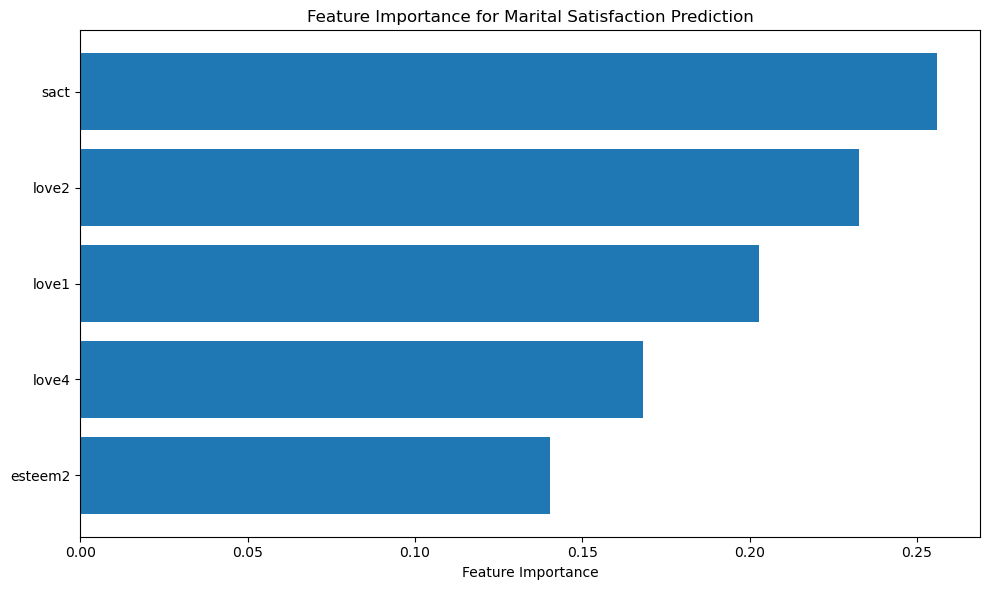

In [25]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Marital Satisfaction Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()